In [1]:
# Bibliotecas
import sys, numpy as np, matplotlib.pyplot as plt, plotly.graph_objects as go, pandas as pd
sys.path.append('../ppgsi_mdp_risk')

from ppgsi_mdp_risk.function import FunctionFactory
from ppgsi_mdp_risk.curves import EquivalentCostCurve
from ppgsi_mdp_risk.graph import CurvePlots
from ppgsi_mdp_risk.processing import BuildCurve

%load_ext autoreload
%autoreload 2

# MDP Simples

As seguintes metodologias foram aplicadas neste ambiente:

|Metodologia|Descritivo|
|--|--|
|Exponential Utility Function||
|Piecewise-Linear||
|Polynomial Utility Function||
|VaR (Value at Risk)||
|CVaR (Conditional Value at Risk)||



## Configurações

In [2]:
# Parametros
nm_exponential_function = 'ExponentialFunction'
nm_pwl_function = 'PiecewiseTransformation'
nm_polynomial_function = 'PolynomialFunction'
nm_var_method = 'VAR'
nm_cvar_method = 'ConditionalVAR'
_quiet = True

# Objetos ---------------------------
# -----------------------------------

# Funções
_ff = FunctionFactory.FunctionFactory()
_exp = _ff.get_function(nm_exponential_function)
_pwl = _ff.get_function(nm_pwl_function)
_poly = _ff.get_function(nm_polynomial_function)
_var = _ff.get_function(nm_var_method)
_cvar = _ff.get_function(nm_cvar_method)

# Range Probability
rini_p=0.05
rend_p=1
step_p=0.01

# Cria dicionario de objetos para Calculo
_ecc = {}
_ecc[nm_exponential_function] = EquivalentCostCurve.EquivalentCostCurve(_exp, nm_exponential_function, rini_p=rini_p, rend_p=rend_p, step_p=step_p)
_ecc[nm_pwl_function] = EquivalentCostCurve.EquivalentCostCurve(_pwl, nm_pwl_function, rini_p=rini_p, rend_p=rend_p, step_p=step_p)
_ecc[nm_polynomial_function] = EquivalentCostCurve.EquivalentCostCurve(_poly, nm_polynomial_function, rini_p=rini_p, rend_p=rend_p, step_p=step_p)
_ecc[nm_var_method] = EquivalentCostCurve.EquivalentCostCurve(_var, nm_var_method, rini_p=rini_p, rend_p=rend_p, step_p=step_p)
_ecc[nm_cvar_method] = EquivalentCostCurve.EquivalentCostCurve(_cvar, nm_cvar_method, rini_p=rini_p, rend_p=rend_p, step_p=step_p)

# Plots
_cp = CurvePlots.CurvePlots(lib='matplotlib')
_bc = BuildCurve.BuildCurve(_cp)

_cp_plotly = CurvePlots.CurvePlots(lib='plotly')
_bc_plotly = BuildCurve.BuildCurve(_cp_plotly)

# Parametros Especificos
c, p = 1, 0.5
list_p = np.arange(0.1, 1, 0.1)

# Calculo Lambda Extreme
lambda_extreme = _exp._get_lambda_extreme(p, c)

list_lambdas_pos = np.arange(0.1, lambda_extreme, 0.001)
list_lambdas_neg = np.arange(-100, -0.1, 0.1)

list_k_pos = np.arange(0.9, 1, 0.00001)
list_k_neg = np.arange(-1, -0.9, 0.00001)

list_betas_pos = np.arange(1, 60, 0.1)
list_betas_neg = np.arange(1/10**5, 0.1, 0.001)

list_betas = [1/10**9, 0.1, 1, 2, 3, 10, 20, 50]

list_alphas = [0.00001, 0.01, 0.1, 0.5, 0.9, 0.95, 0.99, 0.995, 0.9995]
# list_alphas = [0.9, 0.95, 0.99, 0.995, 0.9995]

## Dicionários

In [3]:
_empirical_result = {}
_multi_empirical_result = {}

_analytical_result = {}
_multi_analytical_result = {}

## Exponential Utility Function

$$
V(s) = \frac{-e^{\lambda c} \times p}{(1 - e^{\lambda c} \times (1-p))}
$$

### Análise Empírica

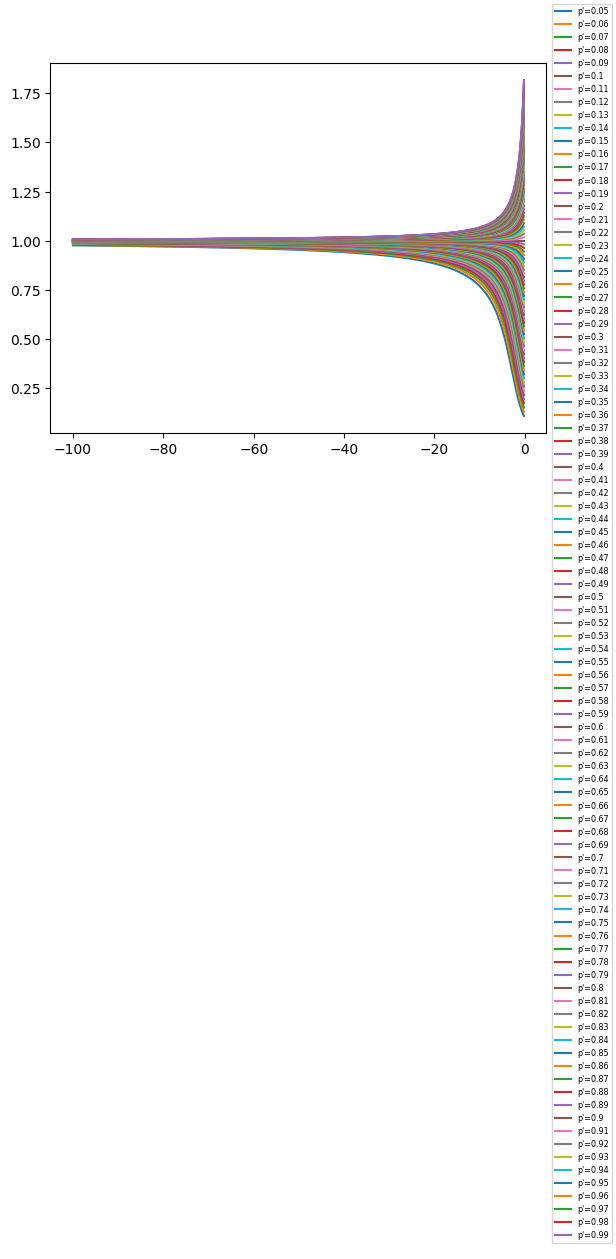

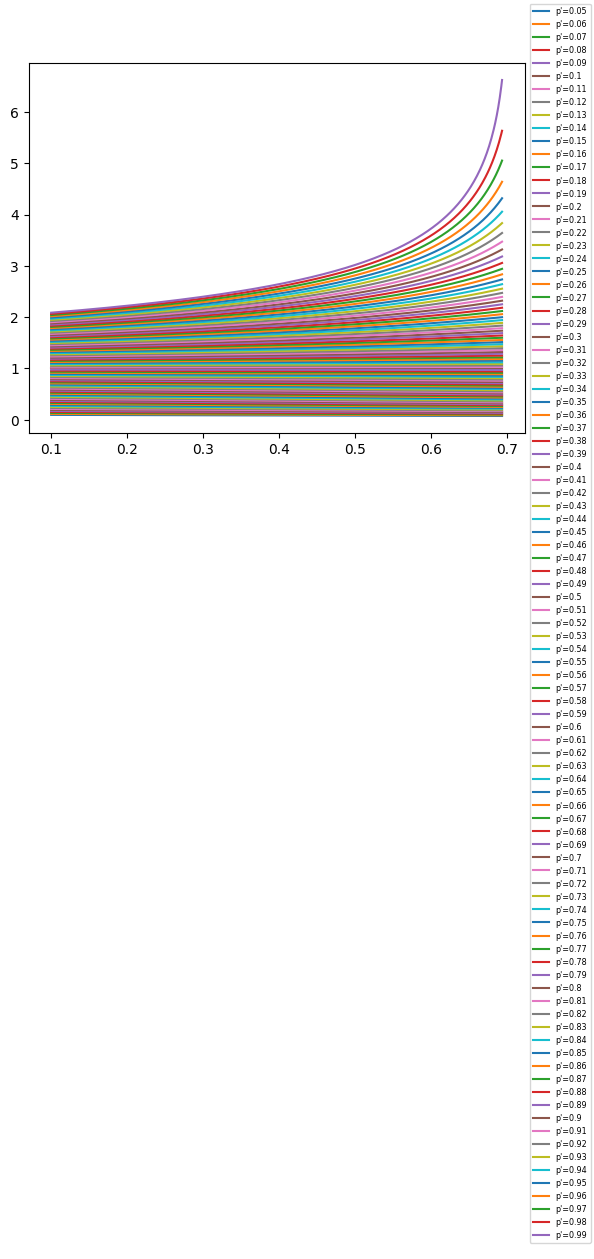

In [4]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_exponential_function,
        _ecc=_ecc[nm_exponential_function],
        list_neg=list_lambdas_neg,
        list_pos=list_lambdas_pos
    )

_empirical_result['EXP-min'] = c_min.copy()
_empirical_result['EXP-max'] = c_max.copy()

C:\Users\Miyamura\Desktop\GIT_MESTRADO\ppgsi_comparable_mdp_risk\notebooks\../ppgsi_mdp_risk\ppgsi_mdp_risk\function\ExponentialFunction.py:23: RuntimeWarning: invalid value encountered in log
  return np.log(v1/v2) * 1/l


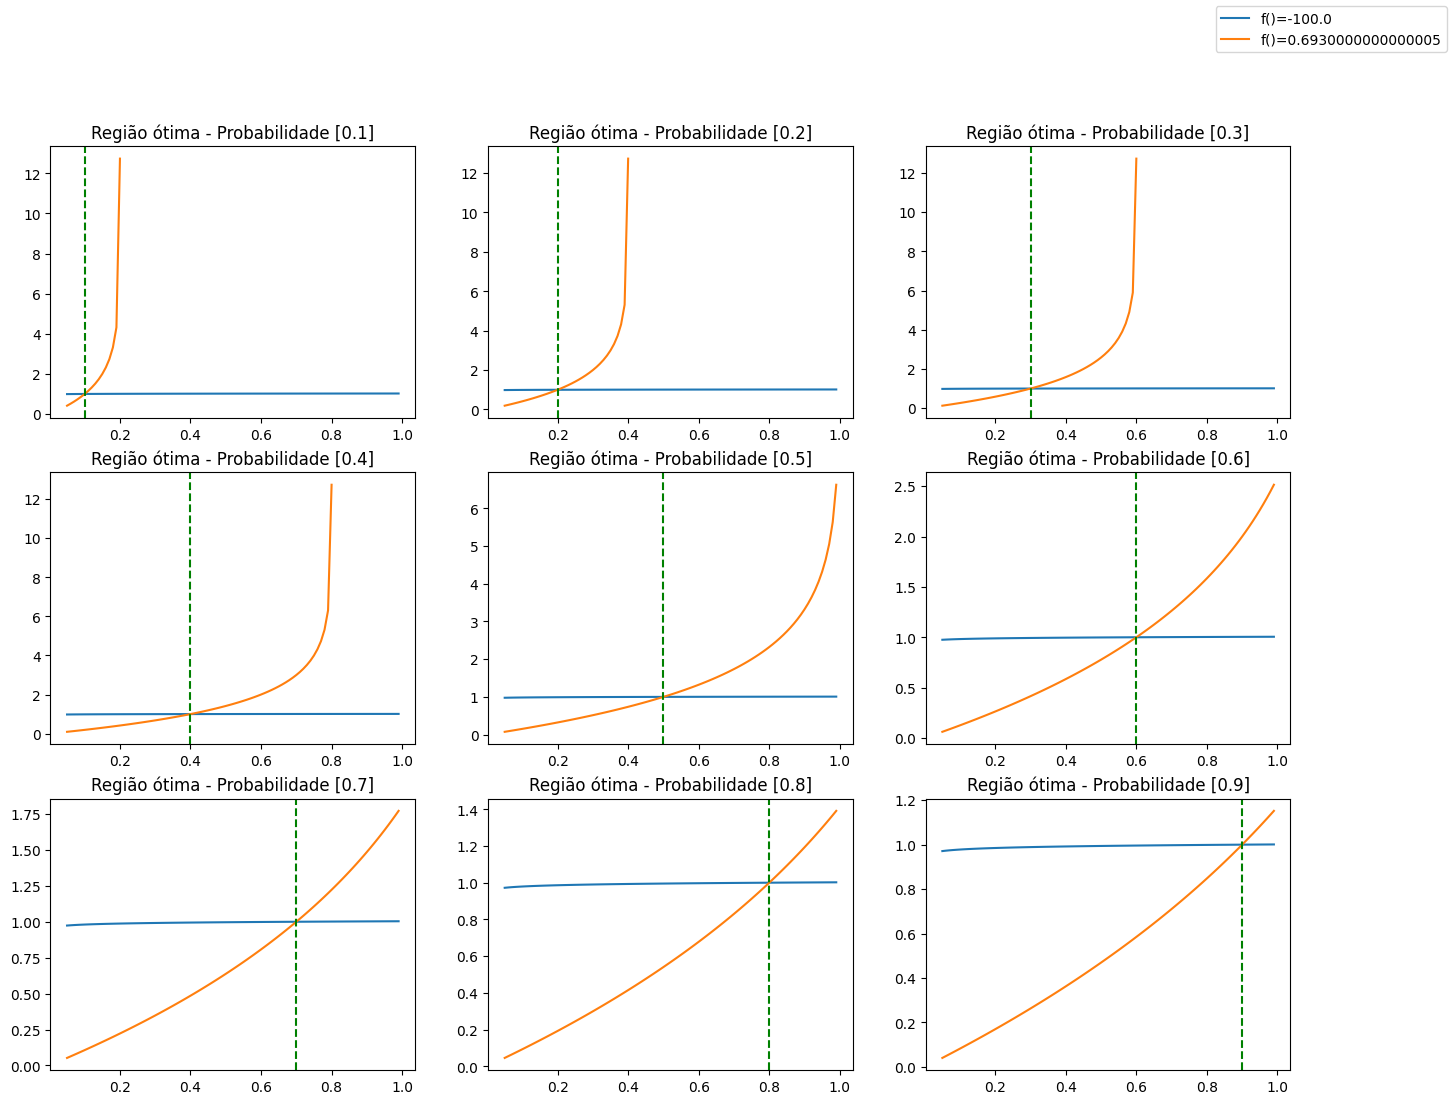

In [5]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_exponential_function,
        _ecc=_ecc[nm_exponential_function],
        list_neg=list_lambdas_neg,
        list_pos=list_lambdas_pos
    )

_multi_empirical_result['EXP'] = dict_curves.copy()

### Formalização dos Limites

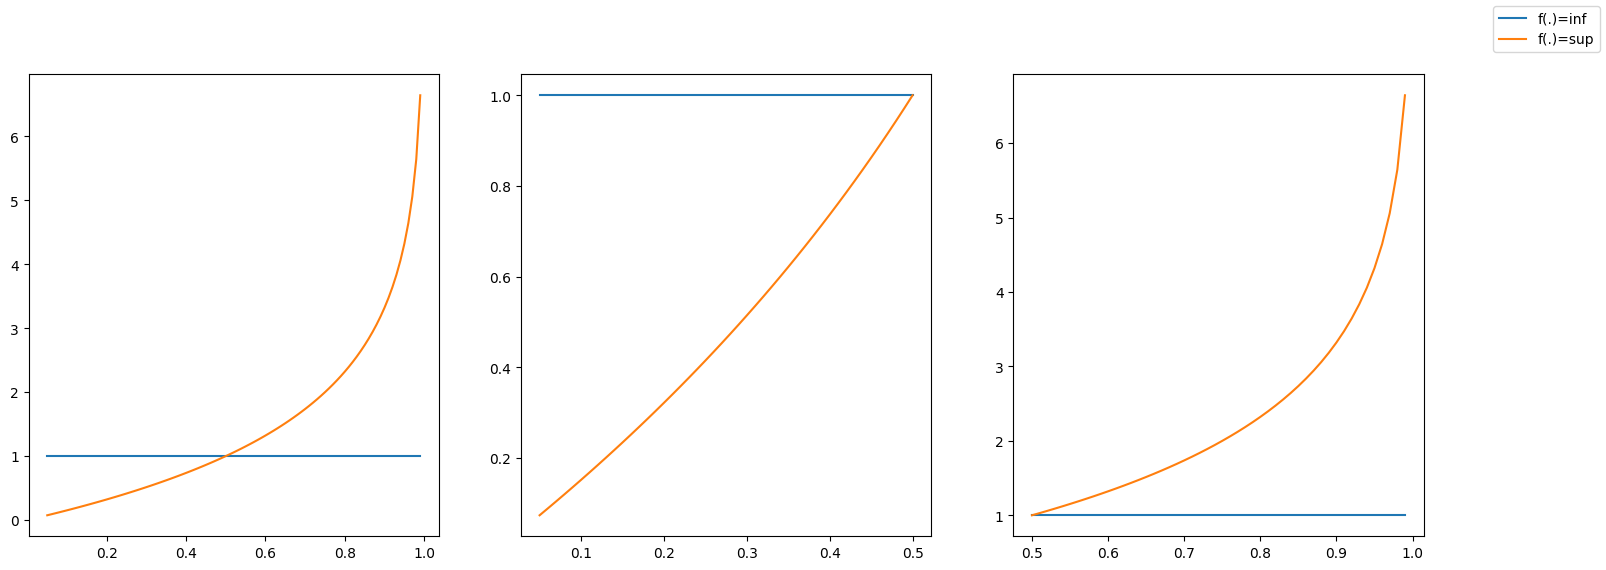

In [6]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits(
    c=c,
    p=p,
    nm_function=nm_exponential_function,
    _ecc=_ecc[nm_exponential_function]
)

_analytical_result['EXP-min'] = df_curves['inf'].copy()
_analytical_result['EXP-max'] = df_curves['sup'].copy()

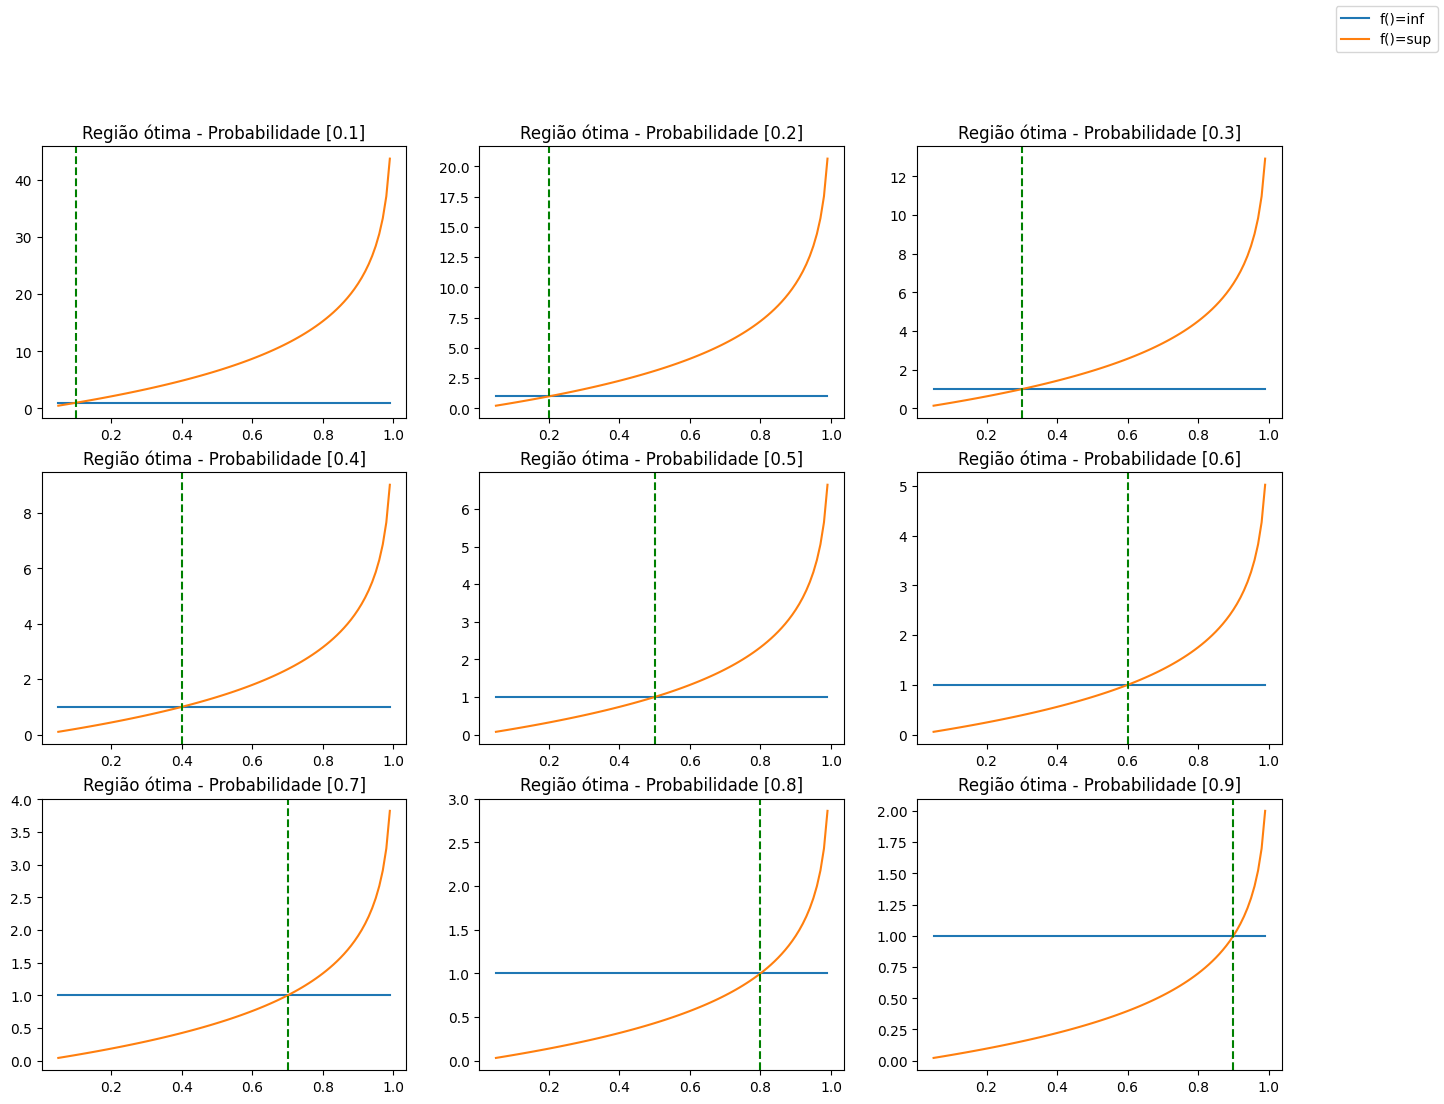

In [7]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits_multiple_prob(
    c=c,
    list_p=list_p,
    nm_function=nm_exponential_function,
    _ecc=_ecc[nm_exponential_function]
)

_multi_analytical_result['EXP'] = df_curves.copy()

## Piecewise-Linear Transformation

$$
V(s) = \frac{c \times (2kp - k + 1)}{(\gamma - 1) \times (k + p - 1) + p - \gamma kp}
$$

### Análise Empírica

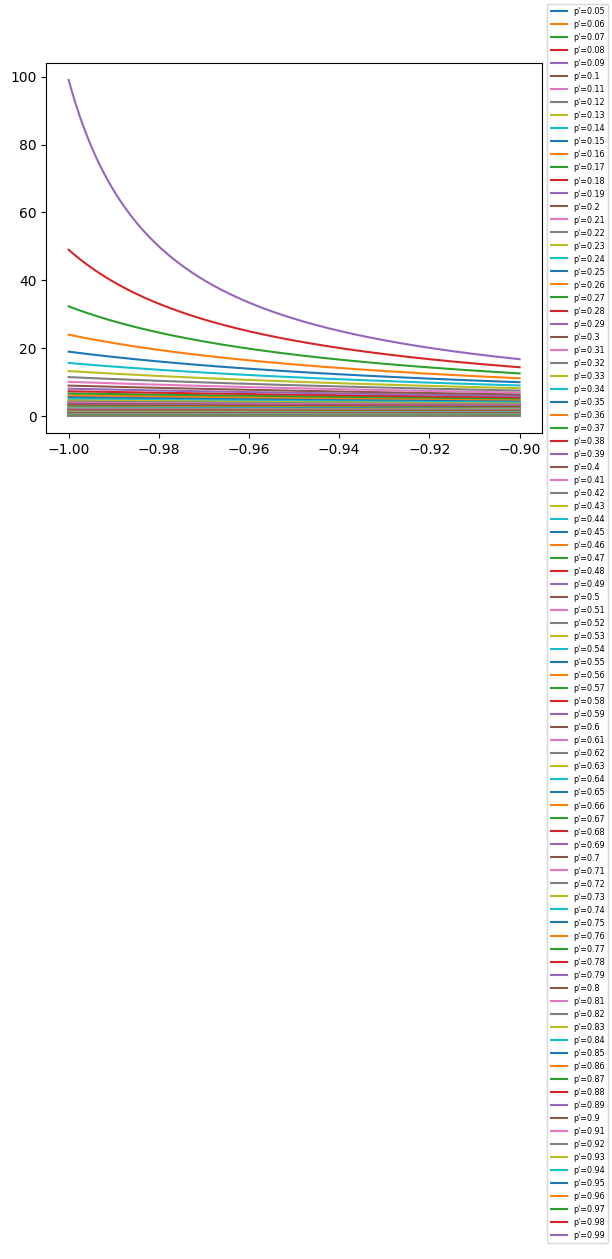

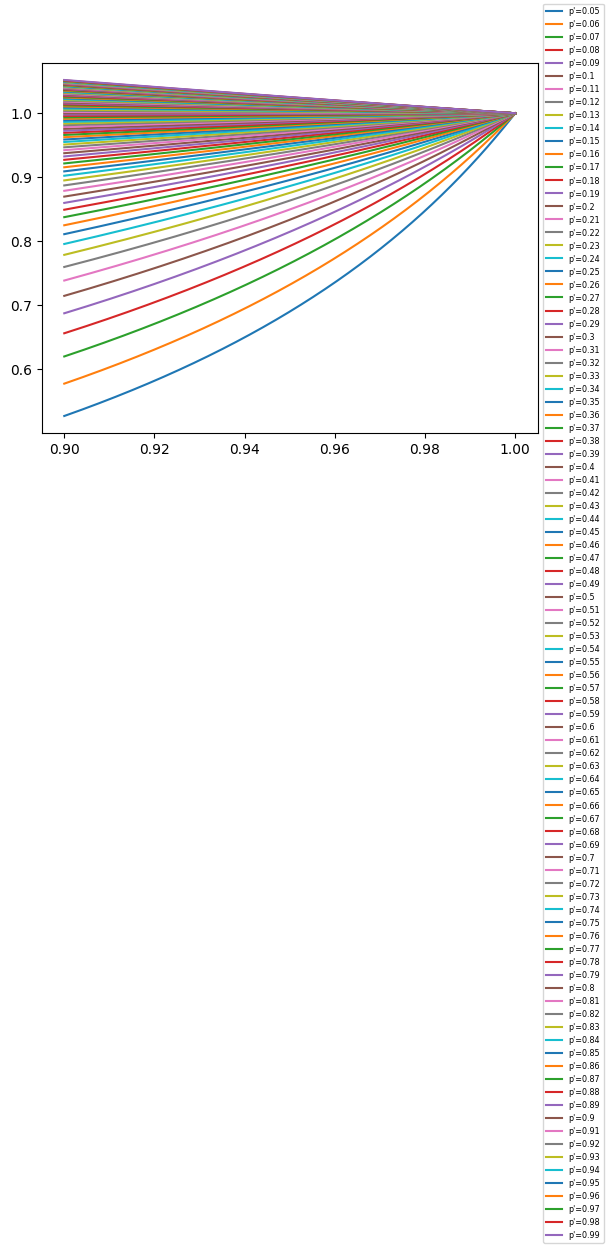

In [8]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_pwl_function,
        _ecc=_ecc[nm_pwl_function],
        list_neg=list_k_neg,
        list_pos=list_k_pos,
        _obj_function=_pwl
    )

_empirical_result['PWL-min'] = c_max.copy()
_empirical_result['PWL-max'] = c_min.copy()

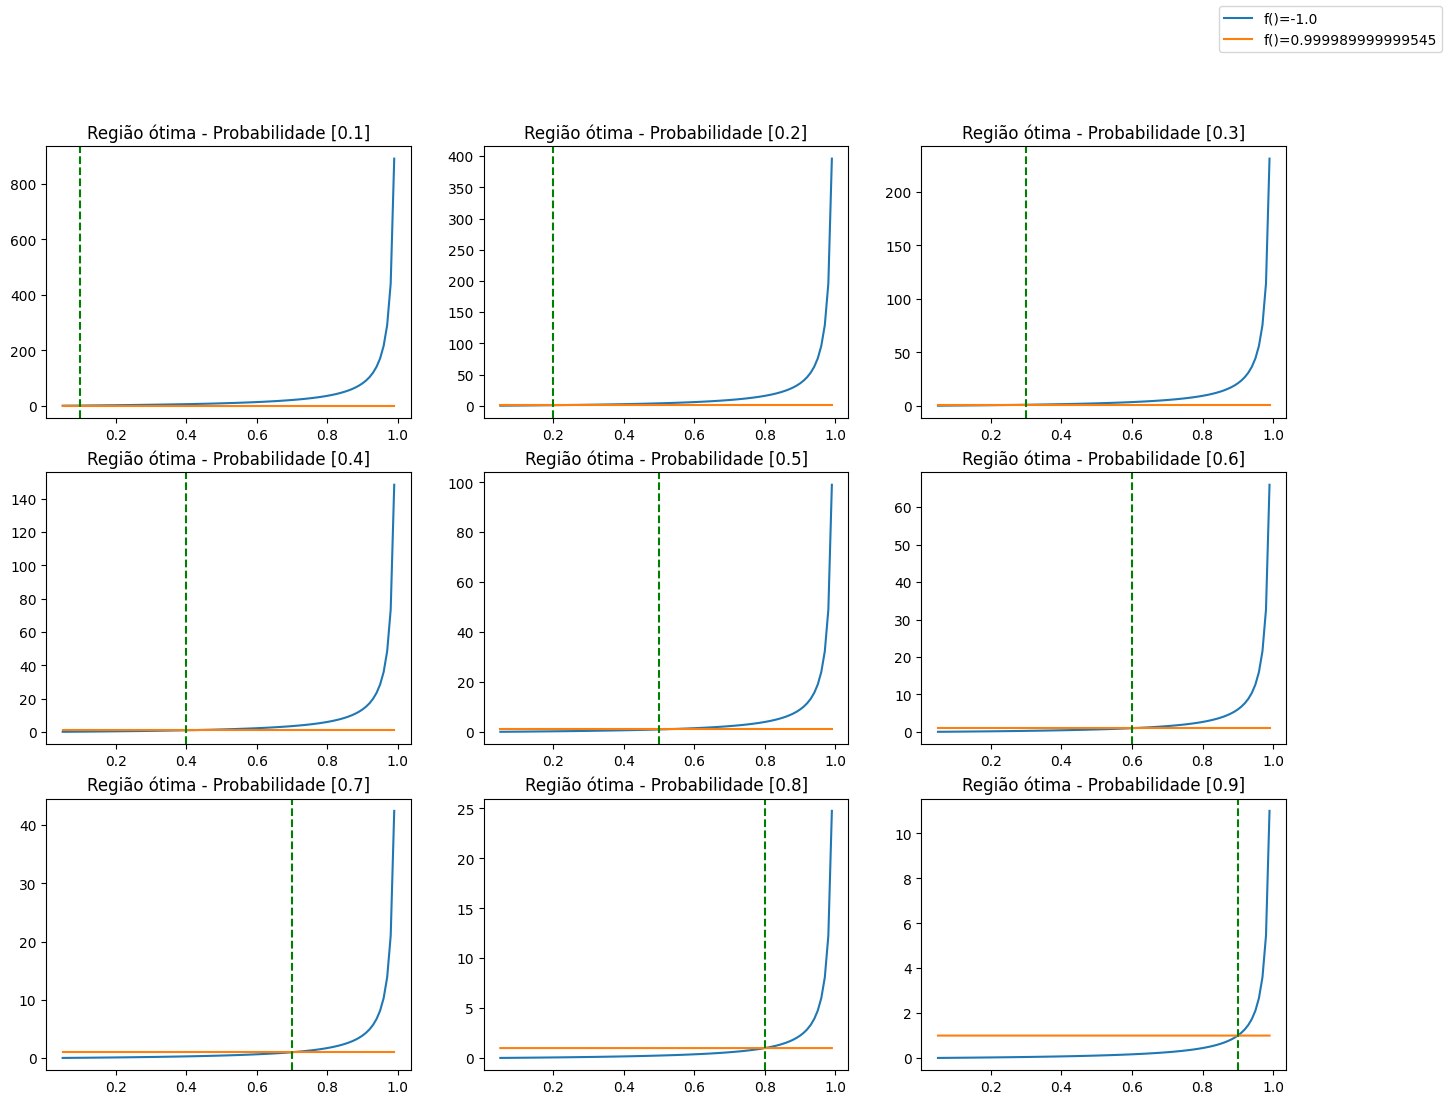

In [9]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_pwl_function,
        _ecc=_ecc[nm_pwl_function],
        list_neg=list_k_neg,
        list_pos=list_k_pos,
        _obj_function=_pwl
    )

_multi_empirical_result['PWL'] = dict_curves.copy()

### Formalização dos Limites

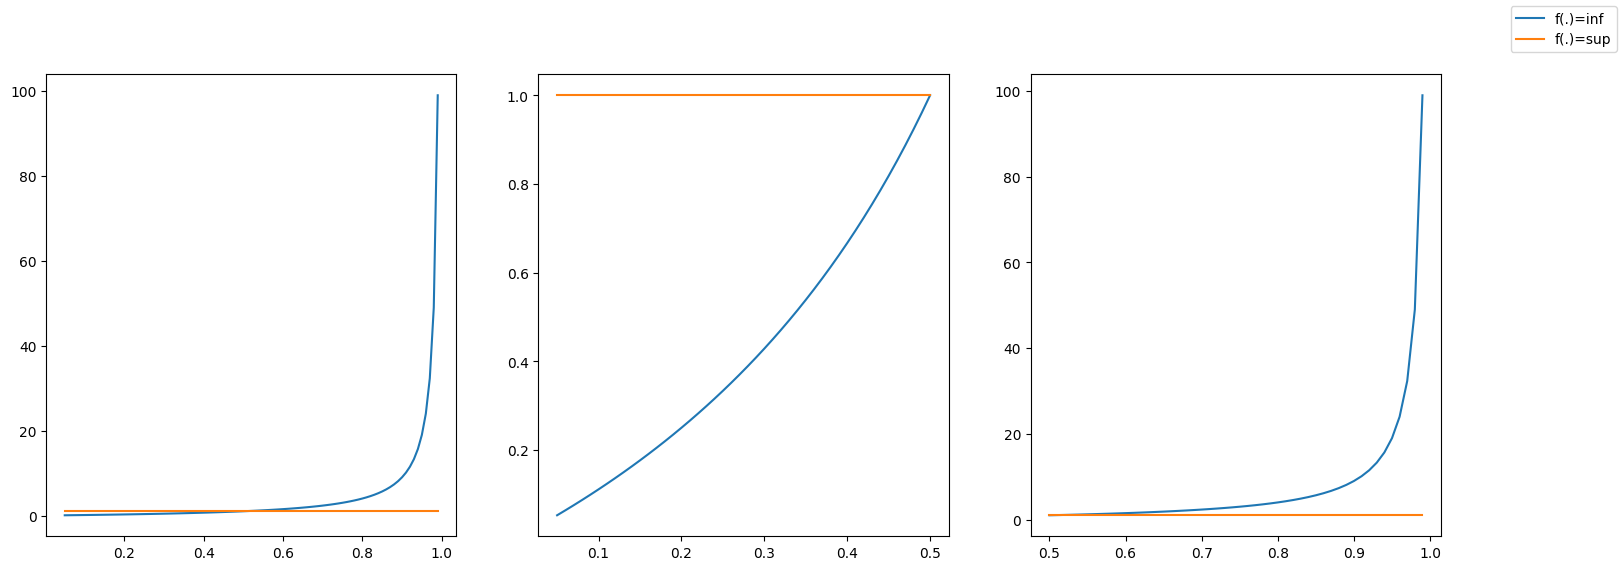

In [10]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits(
    c=c,
    p=p,
    nm_function=nm_pwl_function,
    _ecc=_ecc[nm_pwl_function]
)

_analytical_result['PWL-min'] = df_curves['sup'].copy()
_analytical_result['PWL-max'] = df_curves['inf'].copy()

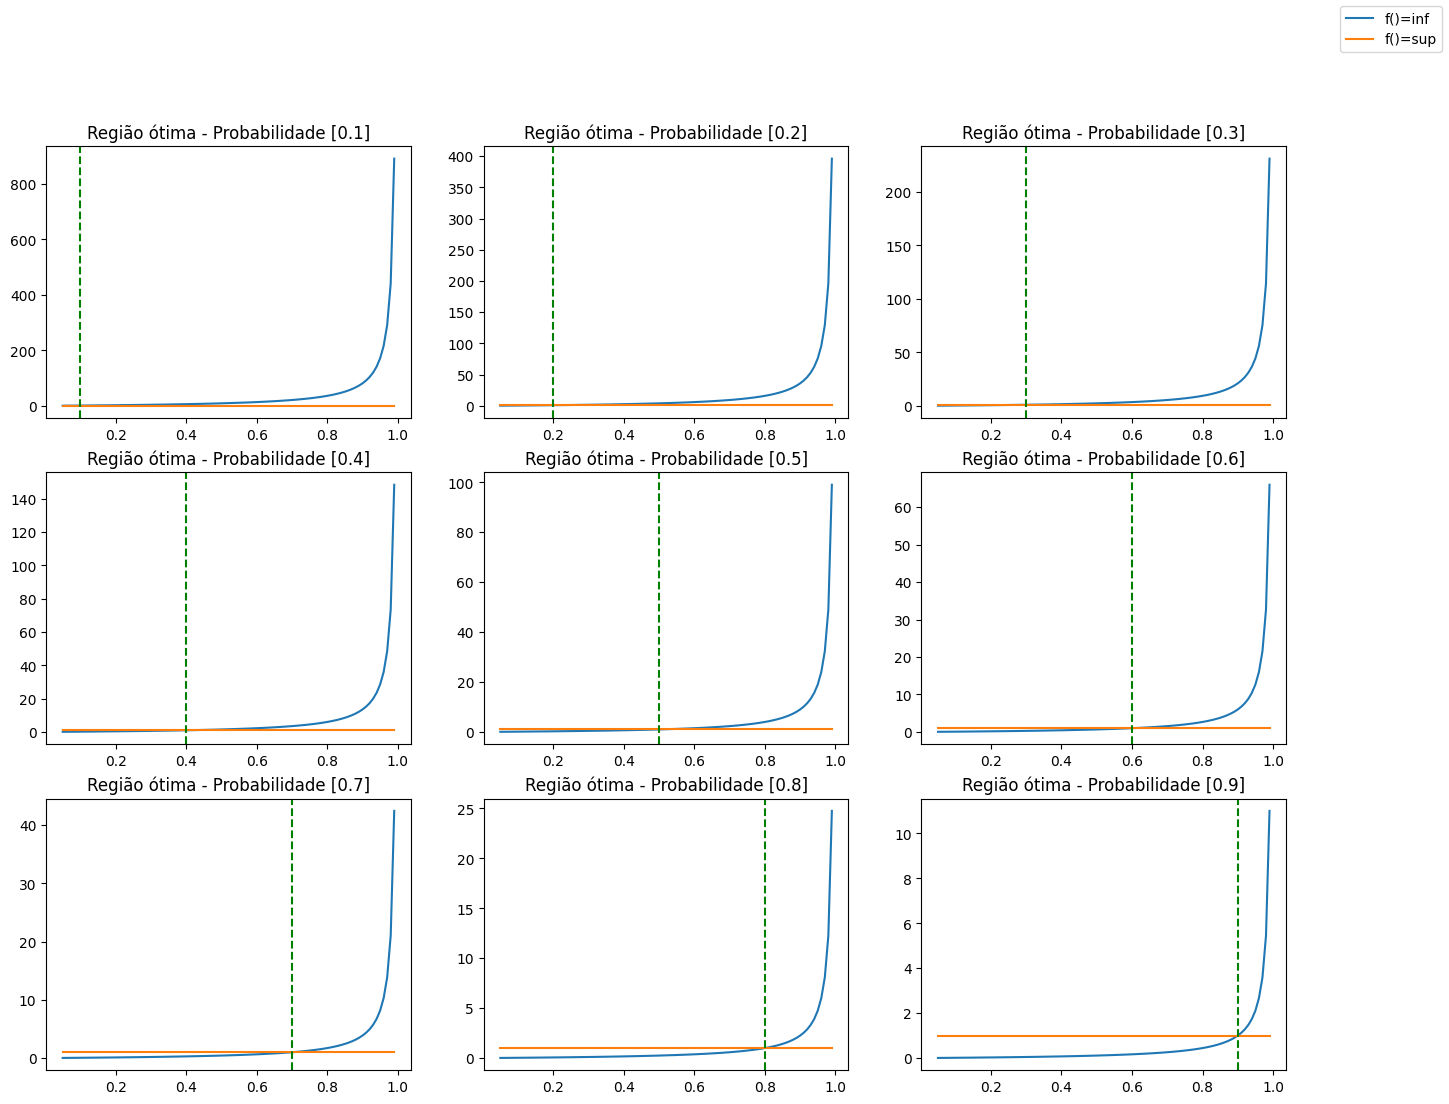

In [11]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits_multiple_prob(
    c=c,
    list_p=list_p,
    nm_function=nm_pwl_function,
    _ecc=_ecc[nm_pwl_function]
)

_multi_analytical_result['PWL'] = df_curves.copy()

## Polynomial Utility Function

$$
V(s) = 
$$

### Análise Empírica

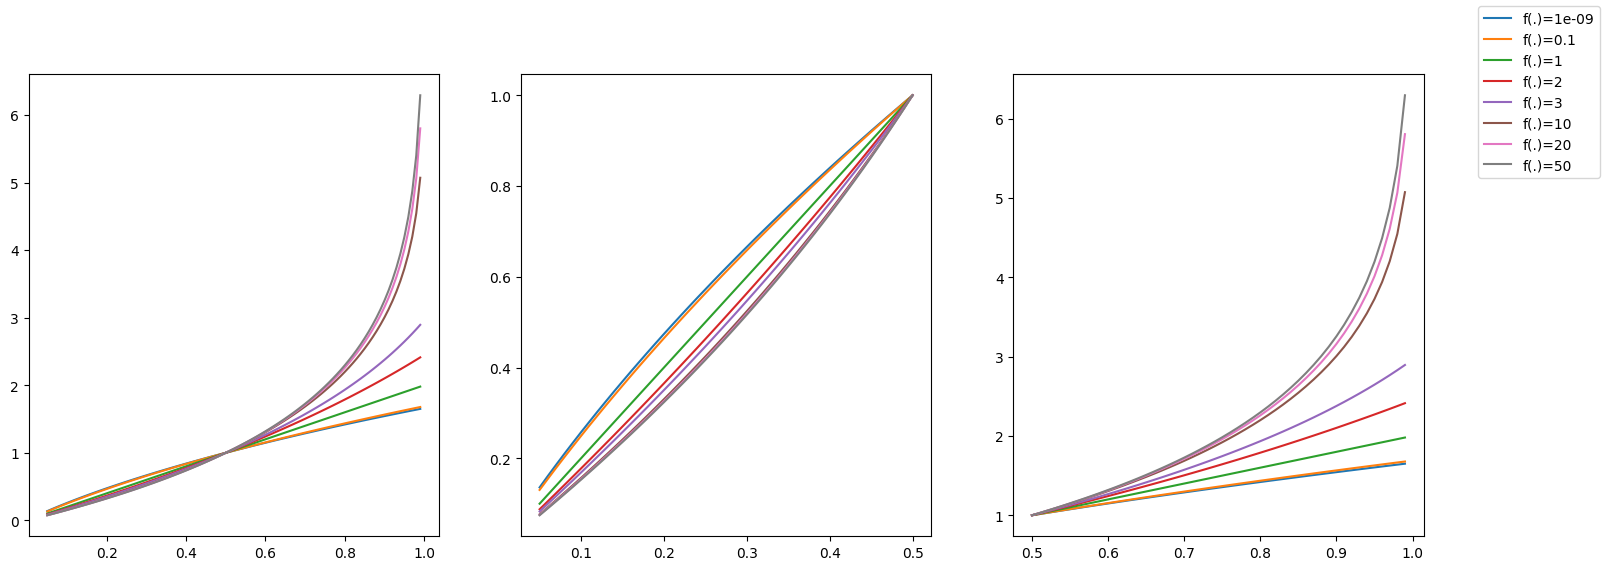

1.000000e-09  1.000000e-01  1.000000e+00  2.000000e+00  3.000000e+00  \
0.05        0.1359        0.1304          0.10        0.0877        0.0829   
0.06        0.1612        0.1549          0.12        0.1055        0.0998   
0.07        0.1859        0.1791          0.14        0.1234        0.1169   
0.08        0.2102        0.2028          0.16        0.1414        0.1341   
0.09        0.2340        0.2262          0.18        0.1595        0.1513   

      1.000000e+01  2.000000e+01  5.000000e+01  
0.05        0.0766        0.0753        0.0745  
0.06        0.0923        0.0908        0.0899  
0.07        0.1082        0.1064        0.1054  
0.08        0.1243        0.1223        0.1211  
0.09        0.1405        0.1382        0.1369

In [12]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_polynomial_function,
        _ecc=_ecc[nm_polynomial_function],
        list_rf=list_betas
    )

display(df.head())

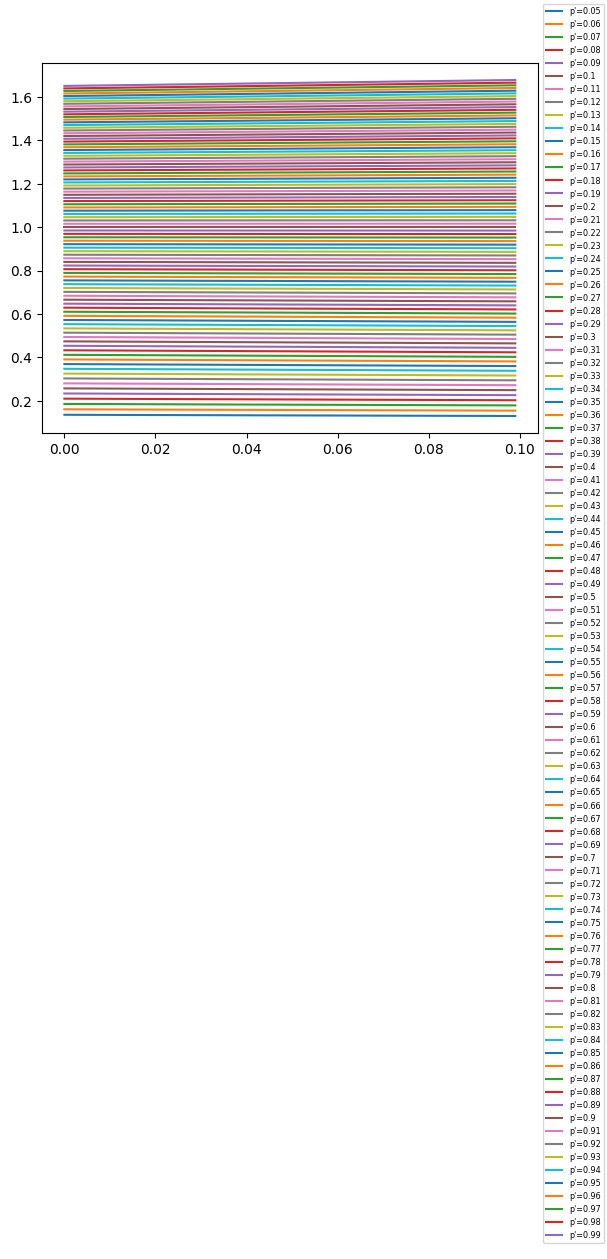

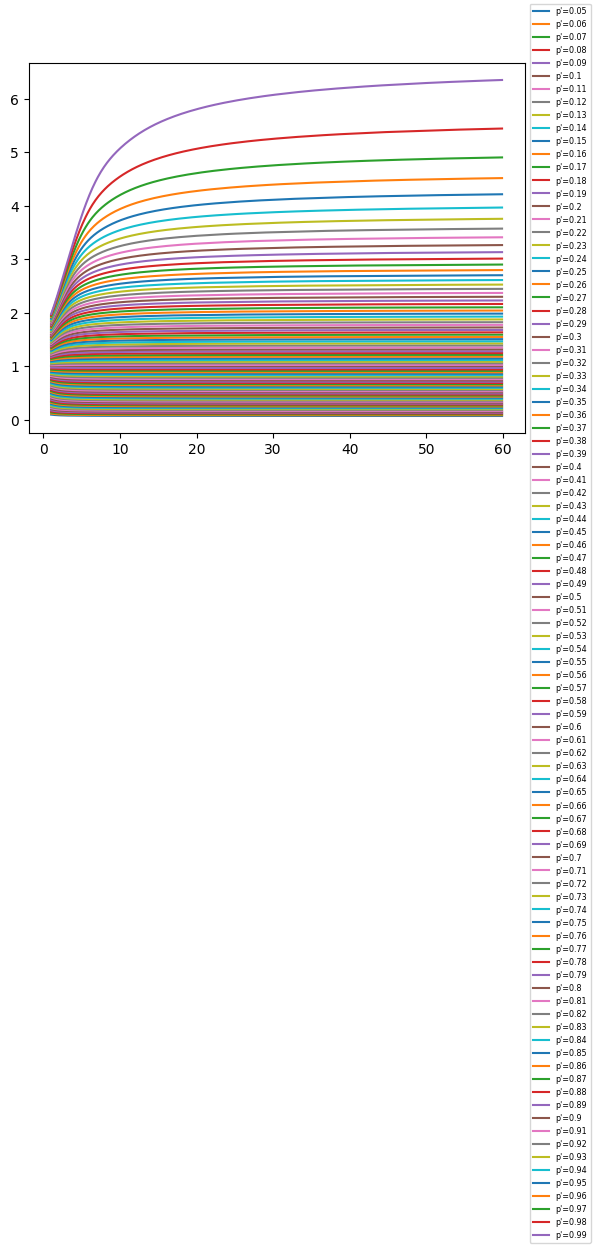

In [13]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_polynomial_function,
        _ecc=_ecc[nm_polynomial_function],
        list_neg=list_betas_neg,
        list_pos=list_betas_pos
    )

_empirical_result['POLY-min'] = c_min.copy()
_empirical_result['POLY-max'] = c_max.copy()

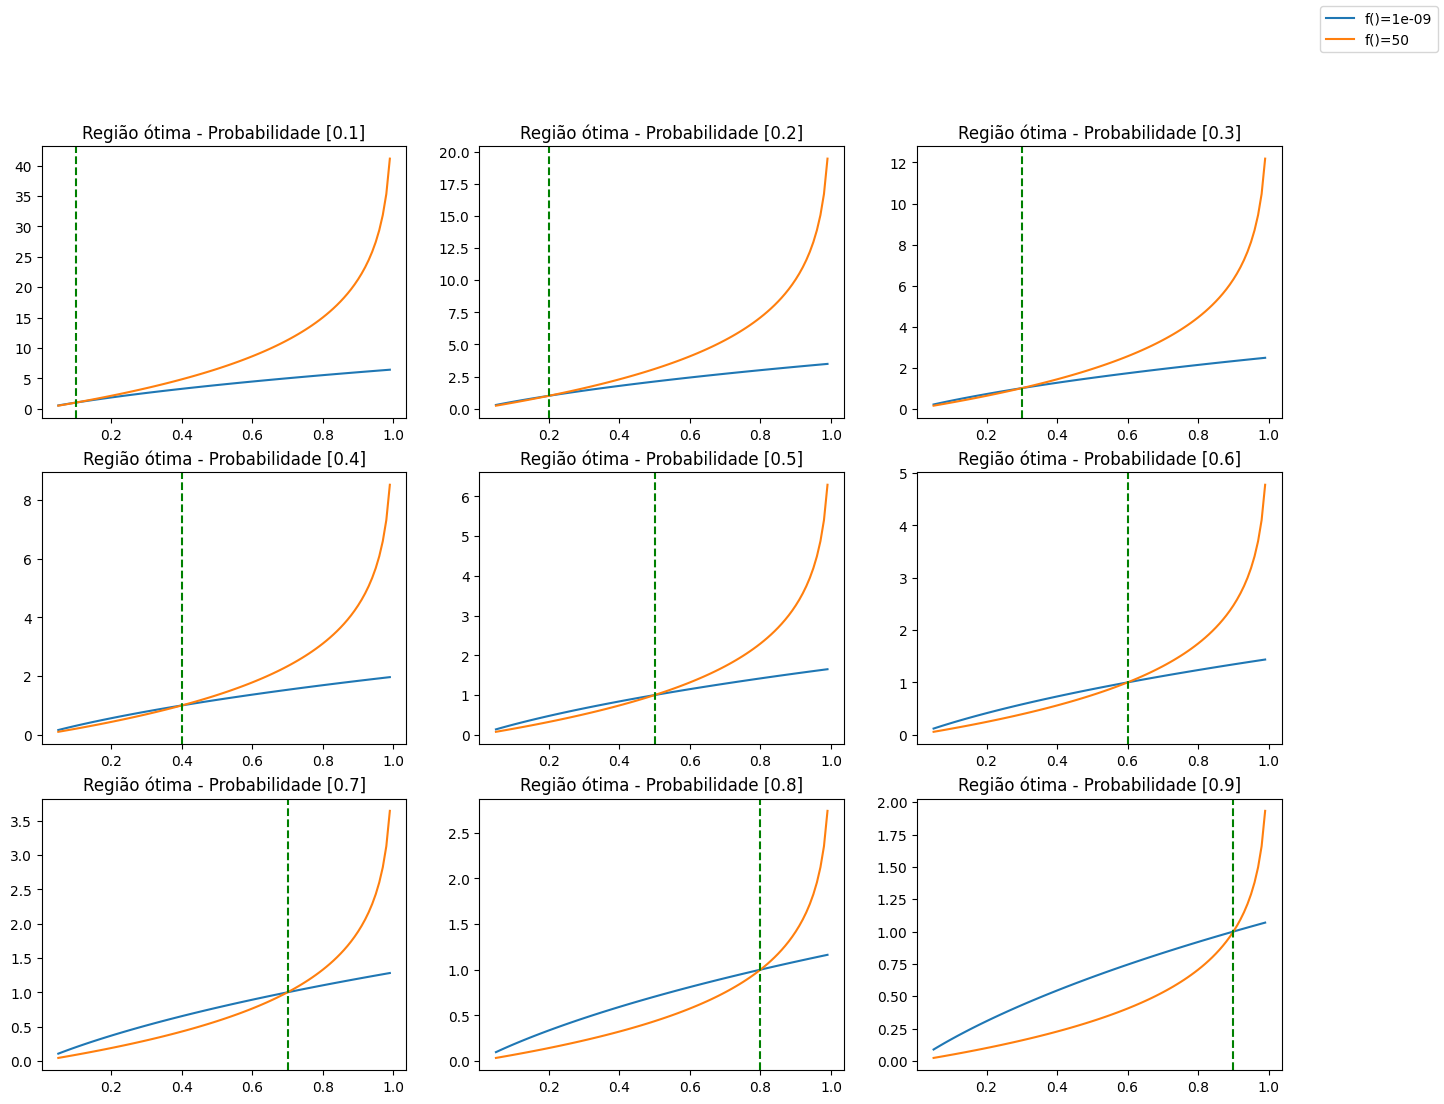

In [14]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_polynomial_function,
        _ecc=_ecc[nm_polynomial_function],
        list_neg=list_betas,
        list_pos=list_betas,
        _obj_function=_pwl
    )

_multi_empirical_result['POLY'] = dict_curves.copy()

### [X] Formalização dos Limites

## VaR (Value at Risk)

### Análise Empírica

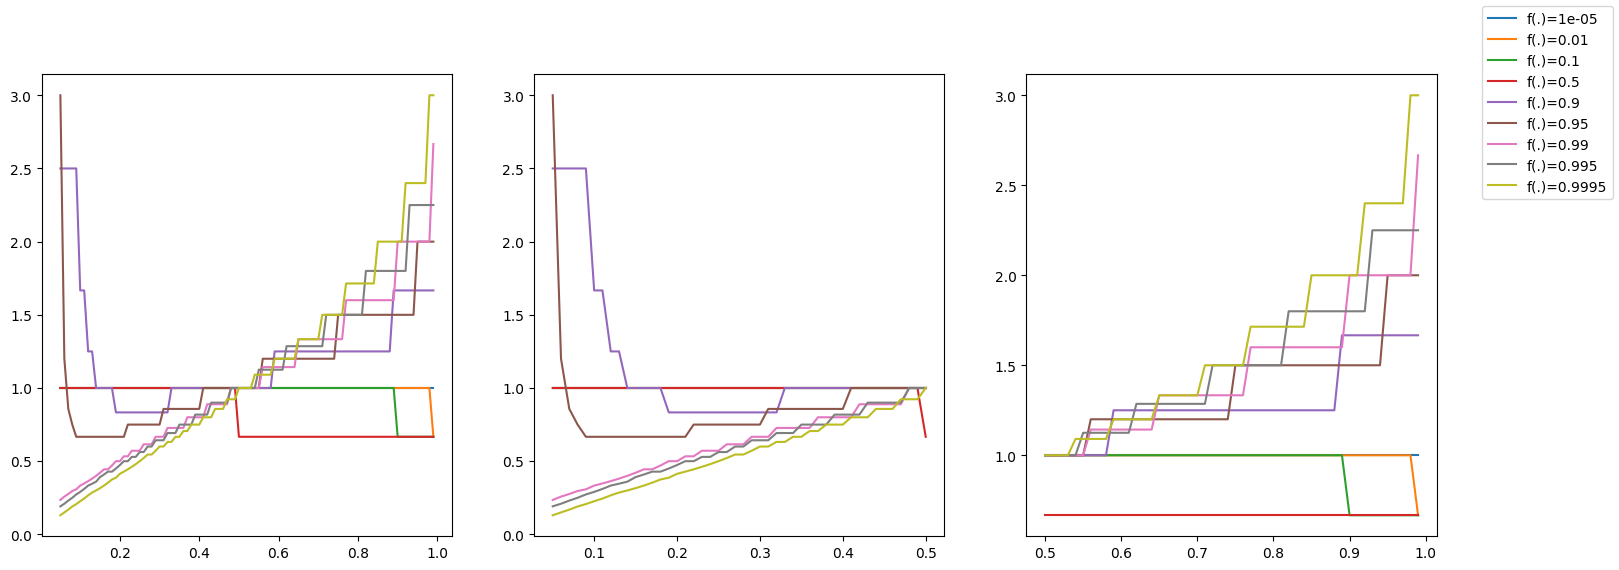

0.00001  0.01000  0.10000  0.50000  0.90000   0.95000   0.99000  \
0.05      1.0      1.0      1.0      1.0      2.5  3.000000  0.235294   
0.06      1.0      1.0      1.0      1.0      2.5  1.200000  0.258065   
0.07      1.0      1.0      1.0      1.0      2.5  0.857143  0.275862   
0.08      1.0      1.0      1.0      1.0      2.5  0.750000  0.296296   
0.09      1.0      1.0      1.0      1.0      2.5  0.666667  0.307692   

       0.99500   0.99950  
0.05  0.191489  0.130435  
0.06  0.209302  0.150000  
0.07  0.230769  0.169014  
0.08  0.250000  0.190476  
0.09  0.272727  0.206897

In [15]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_rf=list_alphas,
        summation=True,
        continuous=False
    )

display(df.head())

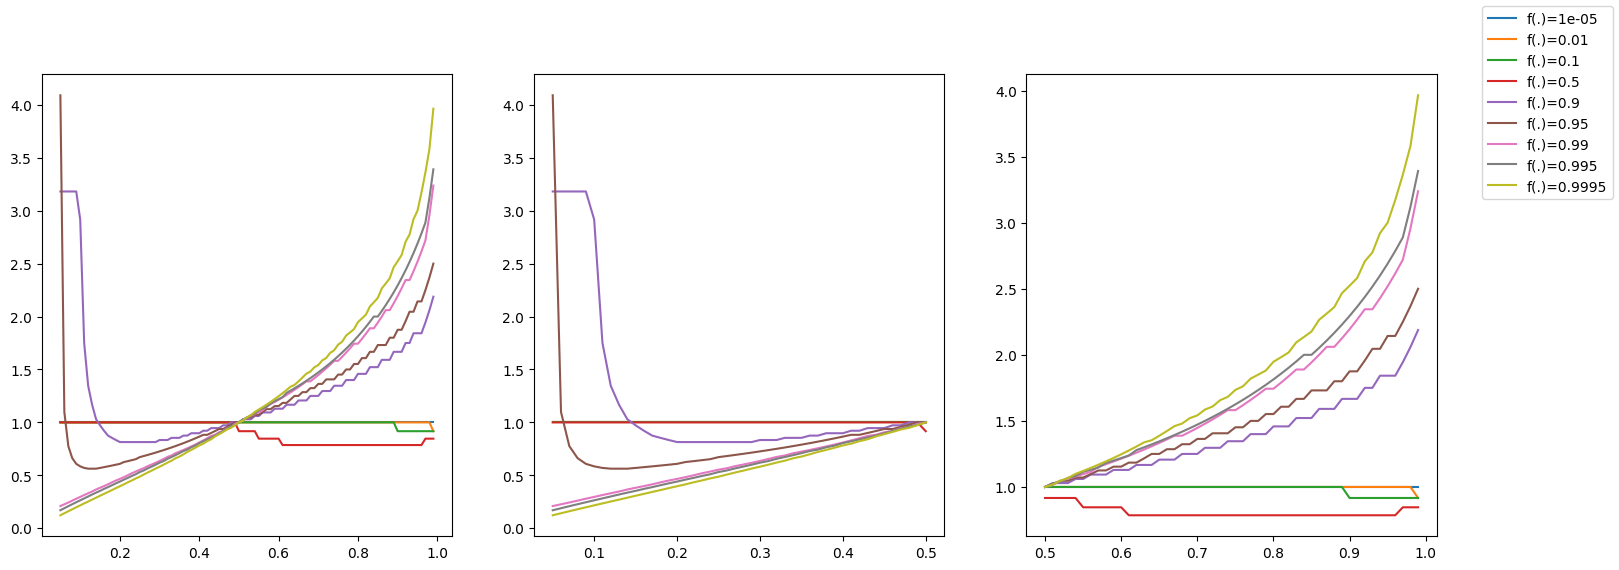

0.00001  0.01000  0.10000  0.50000   0.90000   0.95000   0.99000  \
0.05      1.0      1.0      1.0      1.0  3.181818  4.090909  0.209231   
0.06      1.0      1.0      1.0      1.0  3.181818  1.097561  0.225914   
0.07      1.0      1.0      1.0      1.0  3.181818  0.775862  0.242857   
0.08      1.0      1.0      1.0      1.0  3.181818  0.661765  0.260536   
0.09      1.0      1.0      1.0      1.0  3.181818  0.608108  0.278689   

       0.99500   0.99950  
0.05  0.169565  0.122112  
0.06  0.188862  0.141401  
0.07  0.208000  0.160405  
0.08  0.226744  0.179032  
0.09  0.245283  0.197509

In [16]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_rf=list_alphas,
        summation=True,
        continuous=True
    )

display(df.head())

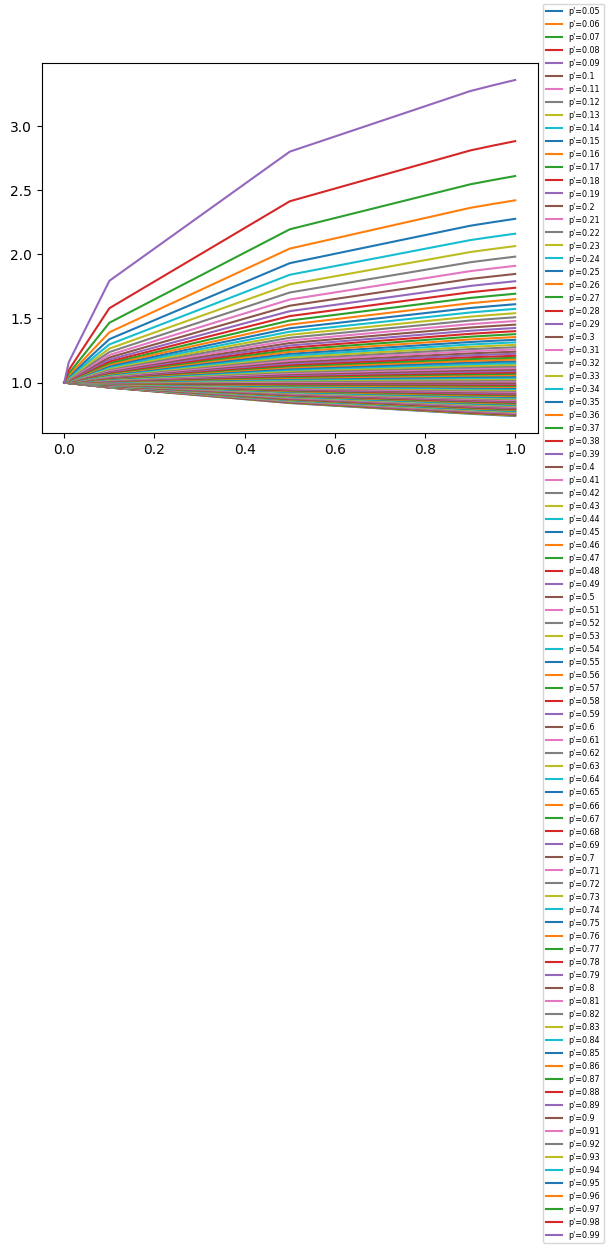

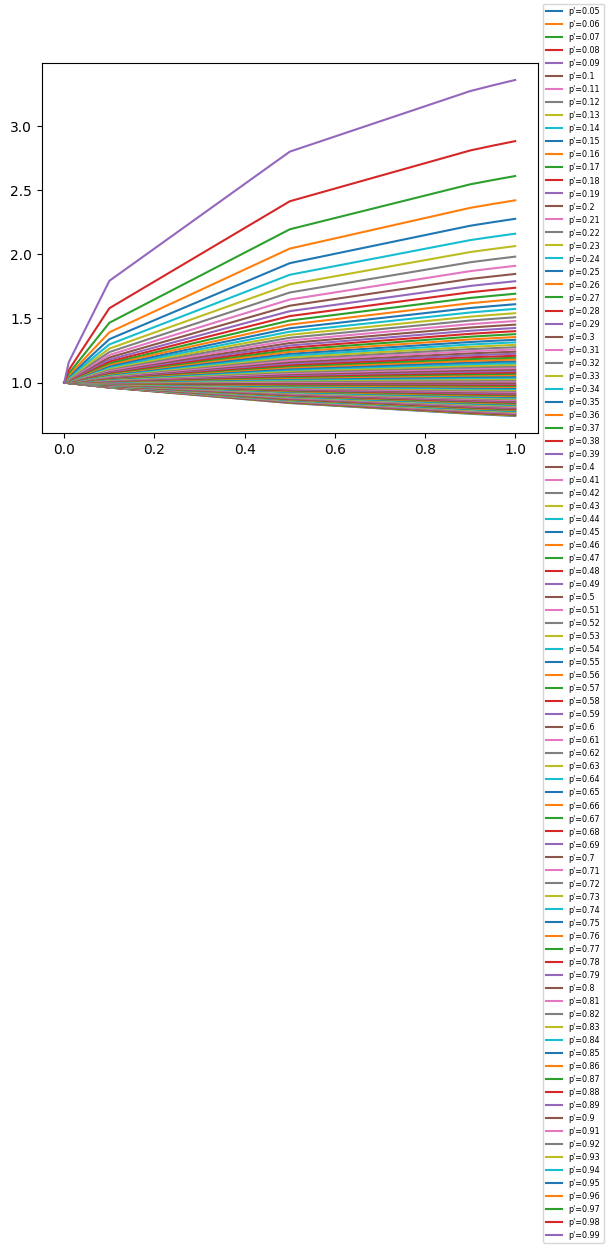

In [17]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_neg=list_alphas,
        list_pos=list_alphas,
        summation=False,
        continuous=True
    )

_empirical_result['VAR-min'] = c_min.copy()
_empirical_result['VAR-max'] = c_max.copy()

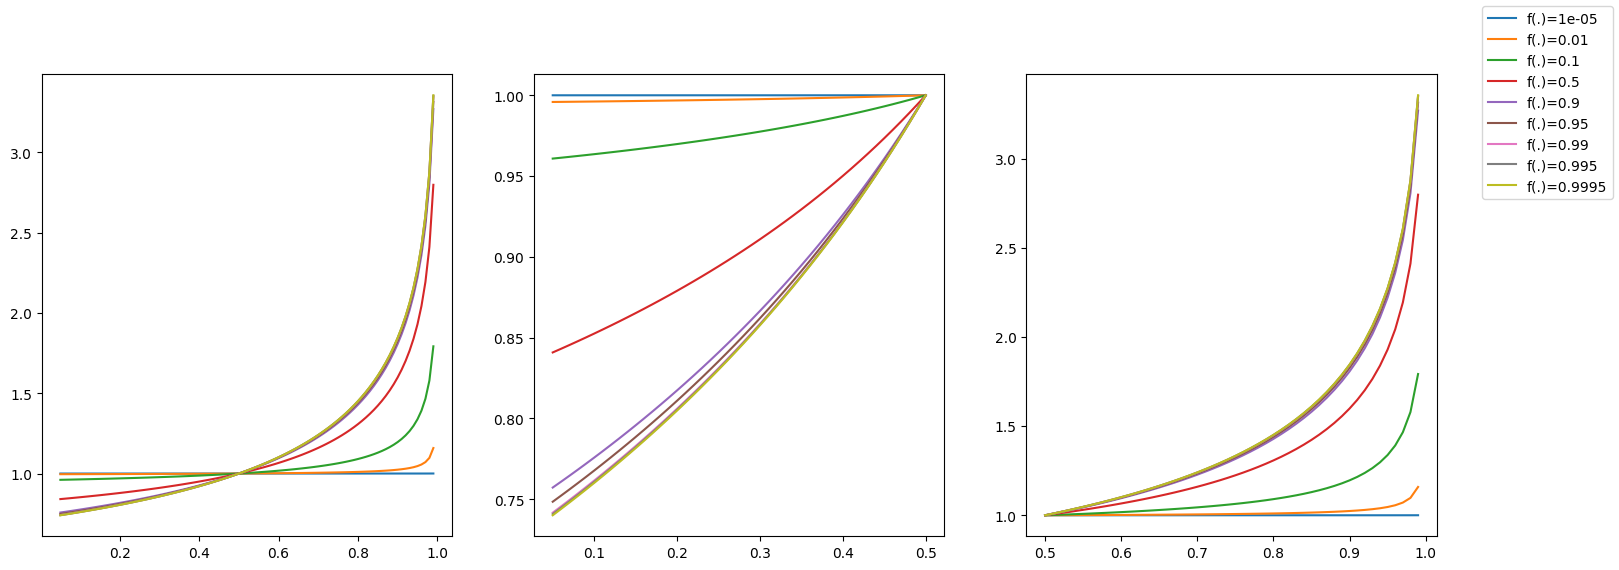

0.00001   0.01000   0.10000   0.50000   0.90000   0.95000   0.99000  \
0.05  0.999996  0.995860  0.960828  0.840856  0.757247  0.748476  0.741677   
0.06  0.999996  0.995915  0.961353  0.843115  0.760844  0.752221  0.745537   
0.07  0.999996  0.995971  0.961888  0.845410  0.764494  0.756019  0.749452   
0.08  0.999996  0.996028  0.962432  0.847741  0.768197  0.759873  0.753423   
0.09  0.999996  0.996085  0.962986  0.850111  0.771955  0.763783  0.757453   

       0.99500   0.99950  
0.05  0.740840  0.740089  
0.06  0.744714  0.743976  
0.07  0.748644  0.747919  
0.08  0.752630  0.751918  
0.09  0.756674  0.755975

In [18]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_rf=list_alphas,
        summation=False,
        continuous=True
    )

display(df.head())

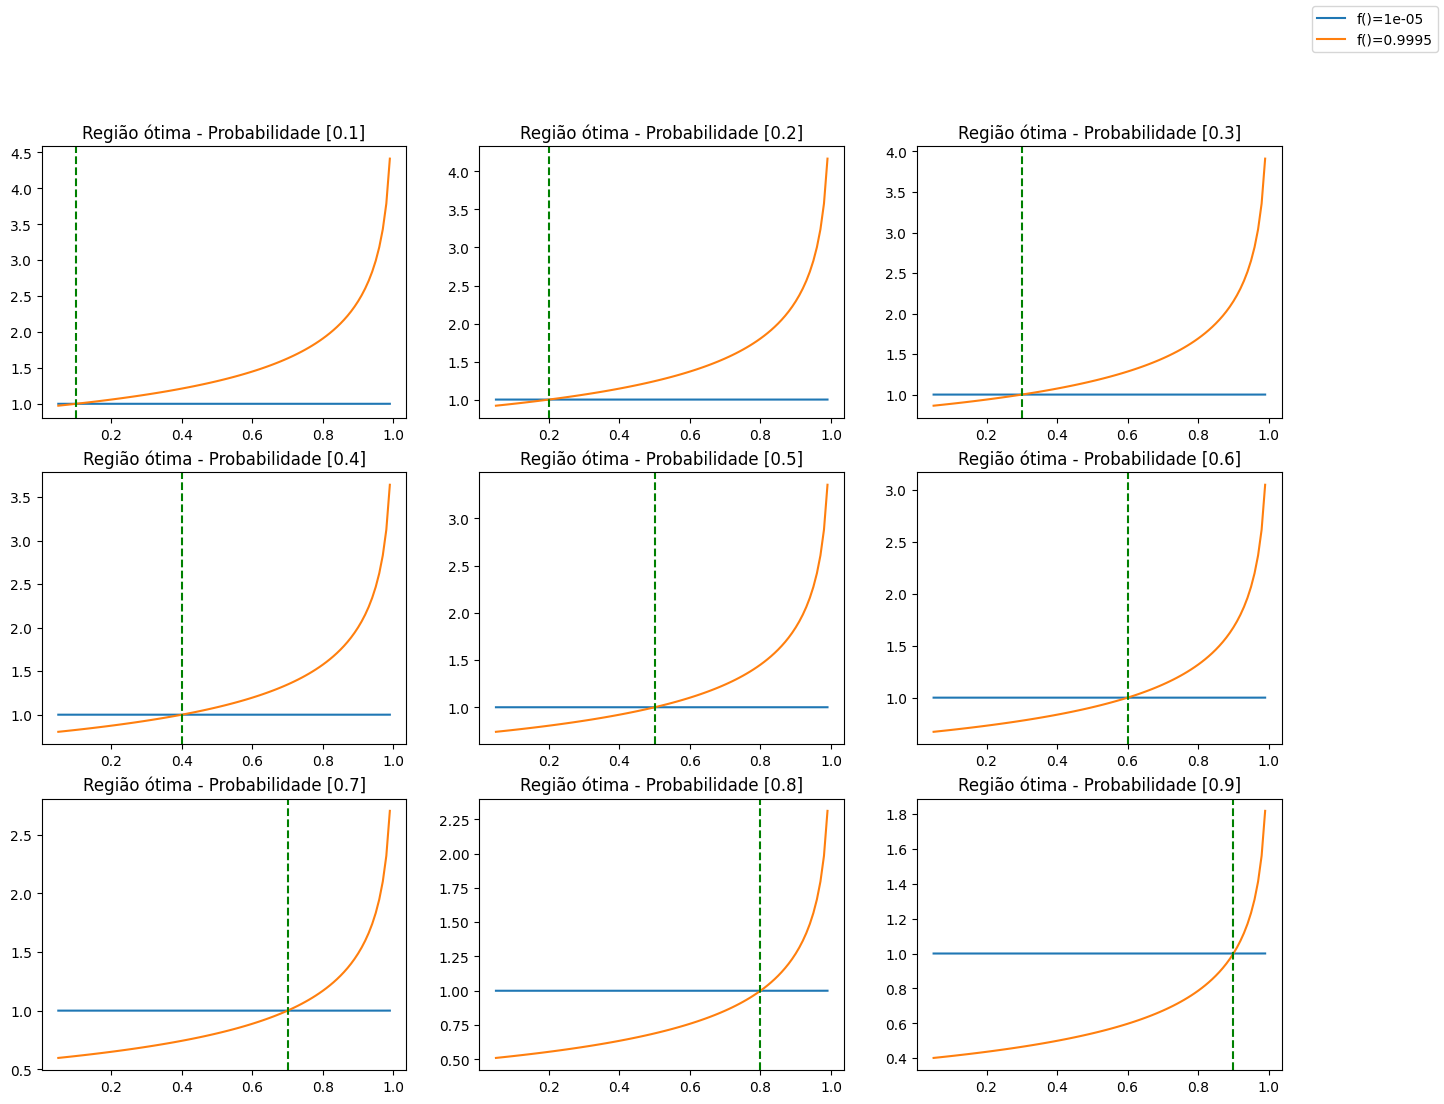

In [19]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_var_method,
        _ecc=_ecc[nm_var_method],
        list_neg=list_alphas,
        list_pos=list_alphas,
        summation=False,
        continuous=True
    )

_multi_empirical_result['VAR'] = dict_curves.copy()

### Formalização dos Limites

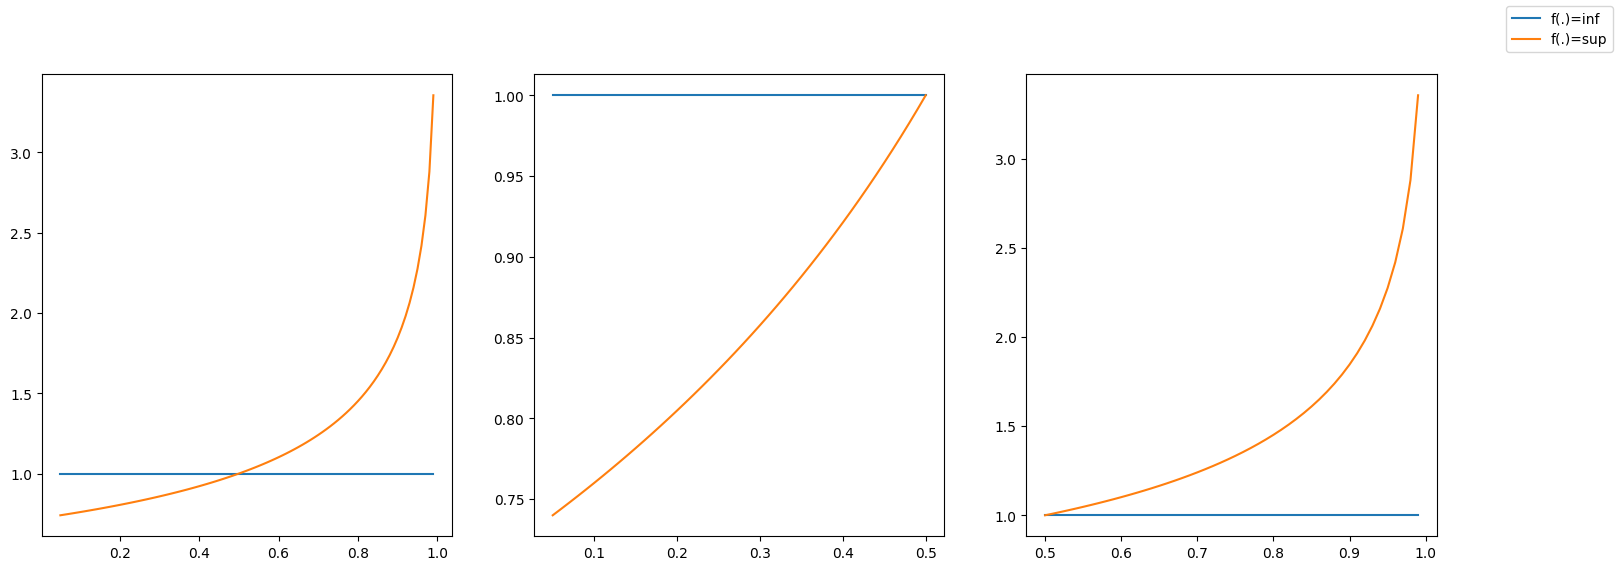

In [20]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits(
    c=c,
    p=p,
    nm_function=nm_var_method,
    _ecc=_ecc[nm_var_method]
)

_analytical_result['VAR-min'] = df_curves['inf'].copy()
_analytical_result['VAR-max'] = df_curves['sup'].copy()

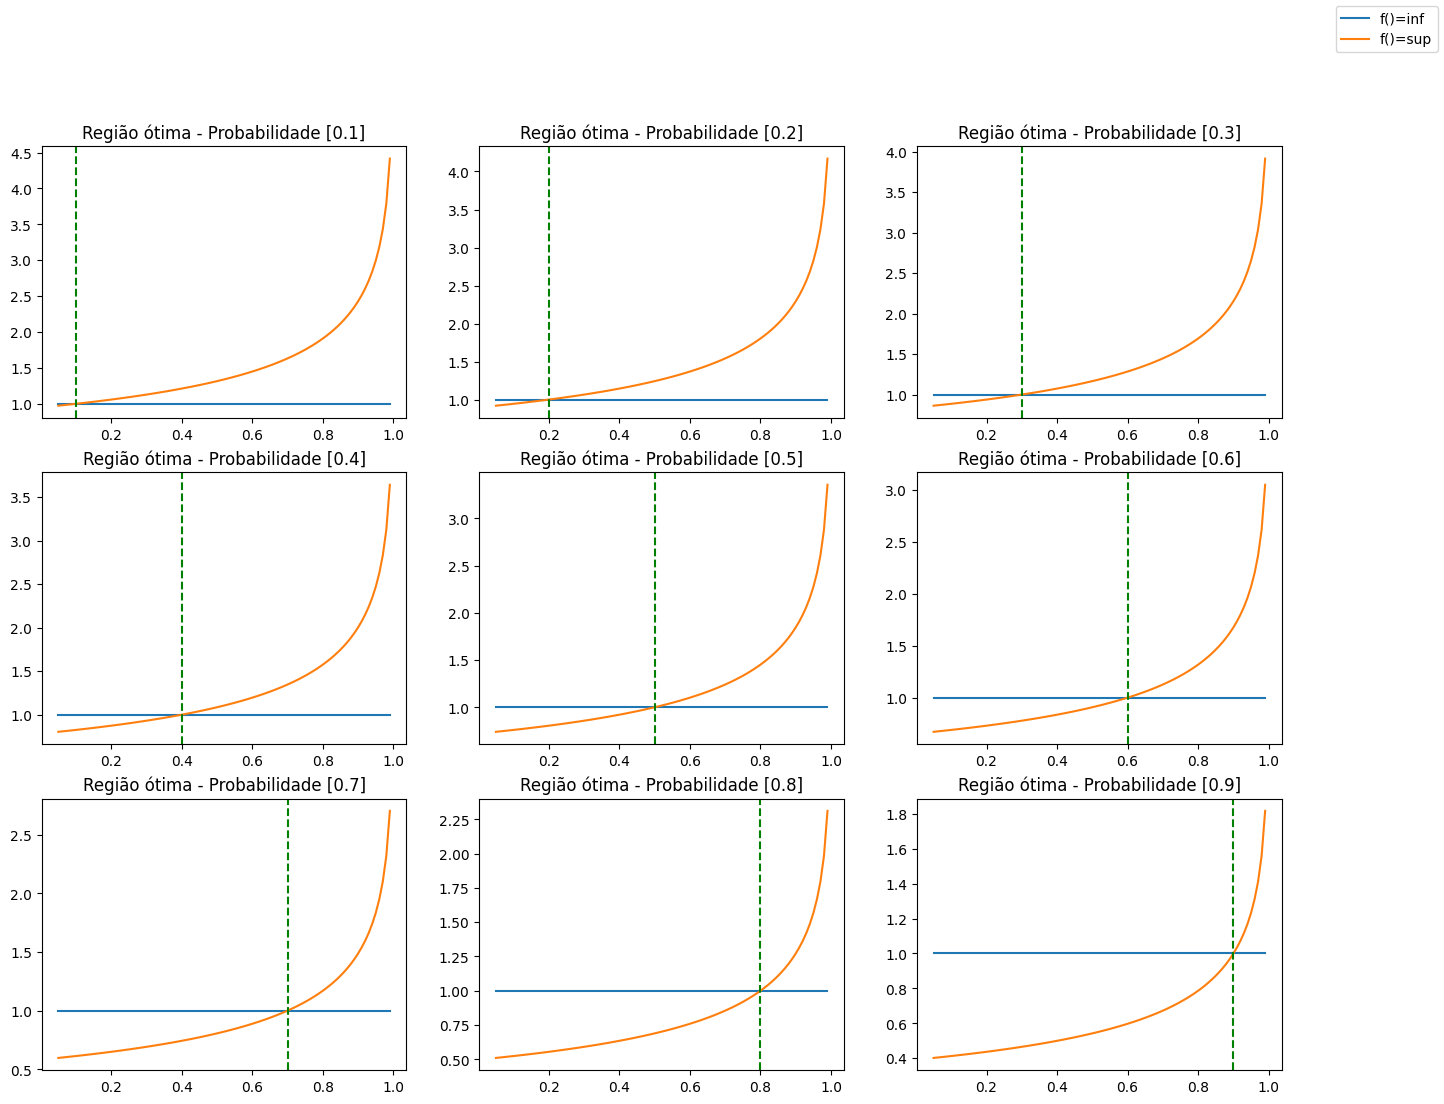

In [21]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits_multiple_prob(
    c=c,
    list_p=list_p,
    nm_function=nm_var_method,
    _ecc=_ecc[nm_var_method]
)

_multi_analytical_result['VAR'] = df_curves.copy()

## CVaR (Conditional Value at Risk)

### Análise Empírica

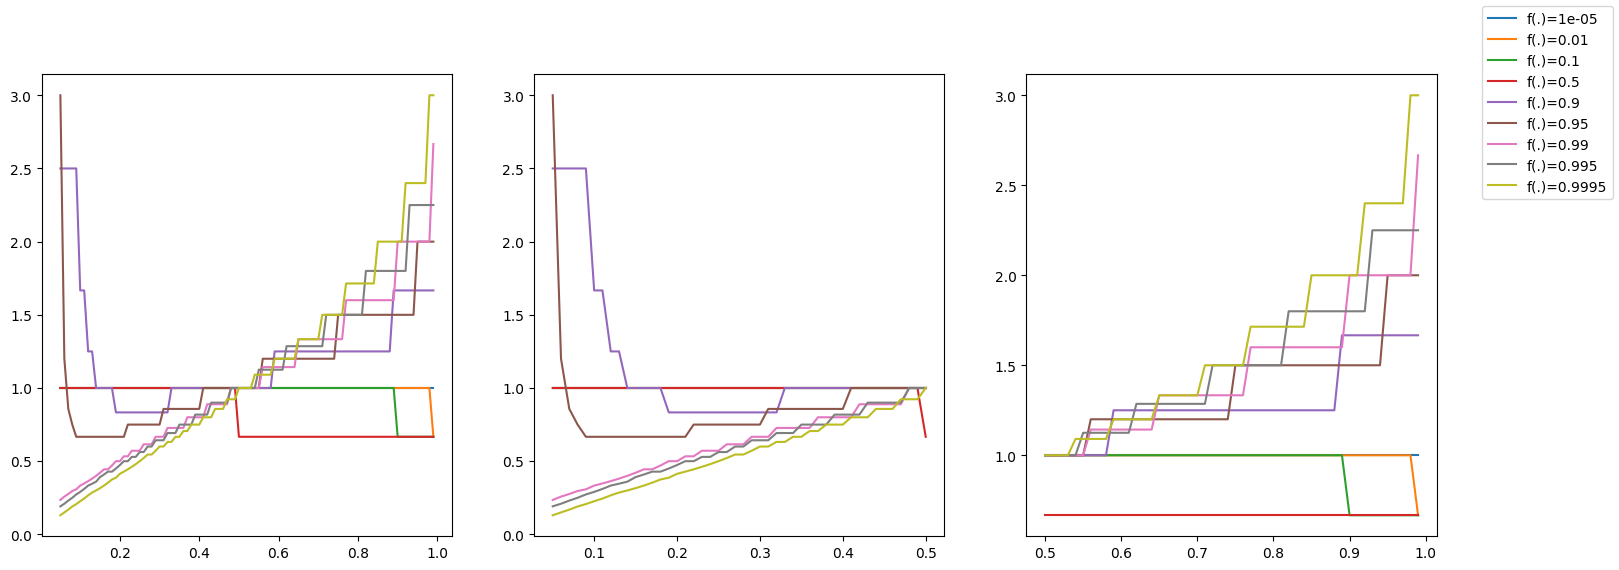

0.00001  0.01000  0.10000  0.50000  0.90000   0.95000   0.99000  \
0.05      1.0      1.0      1.0      1.0      2.5  3.000000  0.235294   
0.06      1.0      1.0      1.0      1.0      2.5  1.200000  0.258065   
0.07      1.0      1.0      1.0      1.0      2.5  0.857143  0.275862   
0.08      1.0      1.0      1.0      1.0      2.5  0.750000  0.296296   
0.09      1.0      1.0      1.0      1.0      2.5  0.666667  0.307692   

       0.99500   0.99950  
0.05  0.191489  0.130435  
0.06  0.209302  0.150000  
0.07  0.230769  0.169014  
0.08  0.250000  0.190476  
0.09  0.272727  0.206897

In [22]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_cvar_method,
        _ecc=_ecc[nm_cvar_method],
        list_rf=list_alphas,
        summation=True,
        continuous=False
    )

display(df.head())

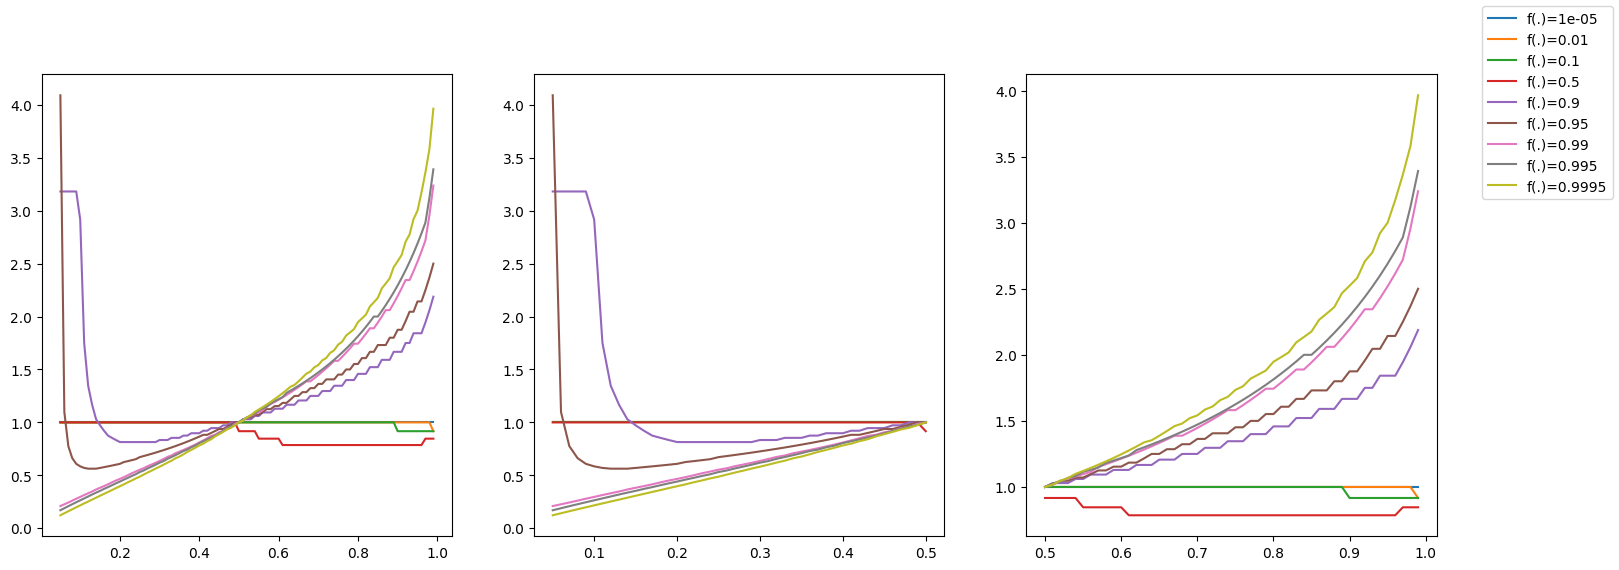

0.00001  0.01000  0.10000  0.50000   0.90000   0.95000   0.99000  \
0.05      1.0      1.0      1.0      1.0  3.181818  4.090909  0.209231   
0.06      1.0      1.0      1.0      1.0  3.181818  1.097561  0.225914   
0.07      1.0      1.0      1.0      1.0  3.181818  0.775862  0.242857   
0.08      1.0      1.0      1.0      1.0  3.181818  0.661765  0.260536   
0.09      1.0      1.0      1.0      1.0  3.181818  0.608108  0.278689   

       0.99500   0.99950  
0.05  0.169565  0.122112  
0.06  0.188862  0.141401  
0.07  0.208000  0.160405  
0.08  0.226744  0.179032  
0.09  0.245283  0.197509

In [23]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_cvar_method,
        _ecc=_ecc[nm_cvar_method],
        list_rf=list_alphas,
        summation=True,
        continuous=True
    )

display(df.head())

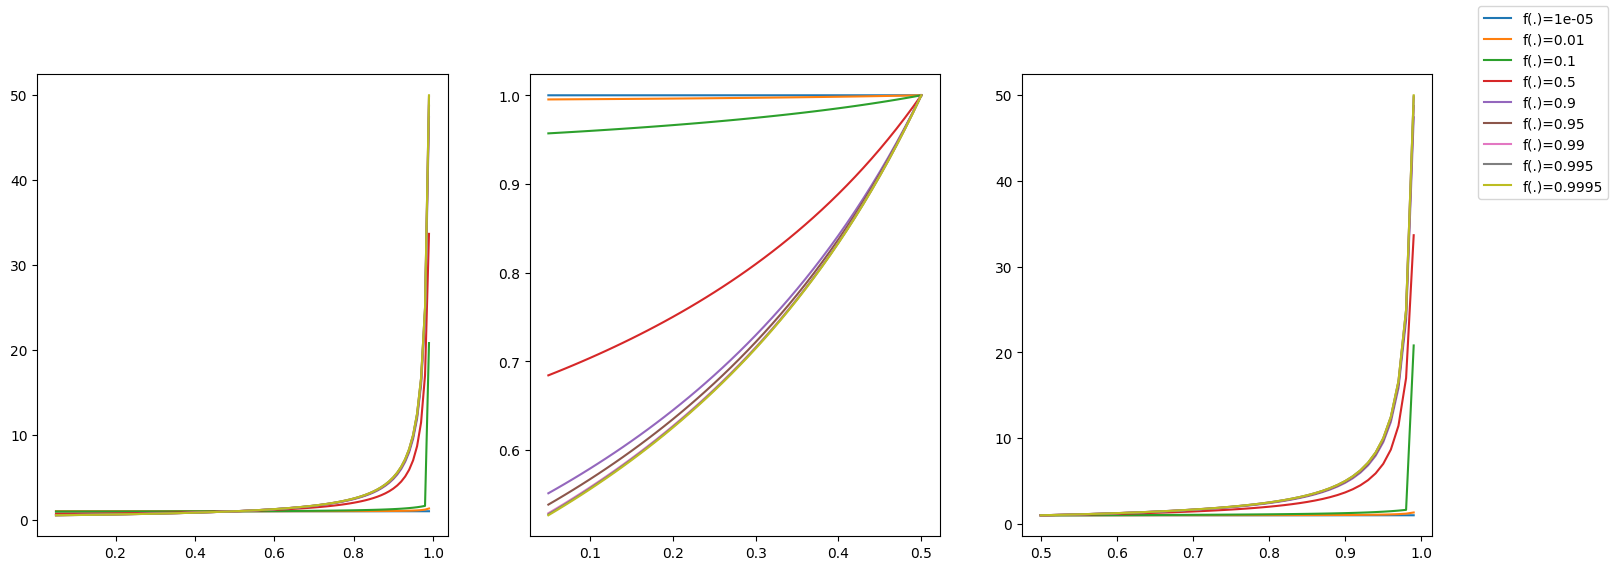

0.00001   0.01000   0.10000   0.50000   0.90000   0.95000   0.99000  \
0.05  0.999995  0.995311  0.957051  0.684211  0.551247  0.538462  0.528696   
0.06  0.999995  0.995367  0.957582  0.687943  0.556551  0.543917  0.534267   
0.07  0.999995  0.995424  0.958124  0.691756  0.561969  0.549490  0.539958   
0.08  0.999995  0.995482  0.958678  0.695652  0.567506  0.555184  0.545772   
0.09  0.999995  0.995541  0.959243  0.699634  0.573164  0.561003  0.551715   

       0.99500   0.99950  
0.05  0.527503  0.526434  
0.06  0.533088  0.532032  
0.07  0.538793  0.537750  
0.08  0.544622  0.543592  
0.09  0.550580  0.549563

In [24]:
res, df = \
    _bc.build_curves_empirical_from_list(
        c=c,
        p=p,
        nm_function=nm_cvar_method,
        _ecc=_ecc[nm_cvar_method],
        list_rf=list_alphas,
        summation=False,
        continuous=False
    )

display(df.head())

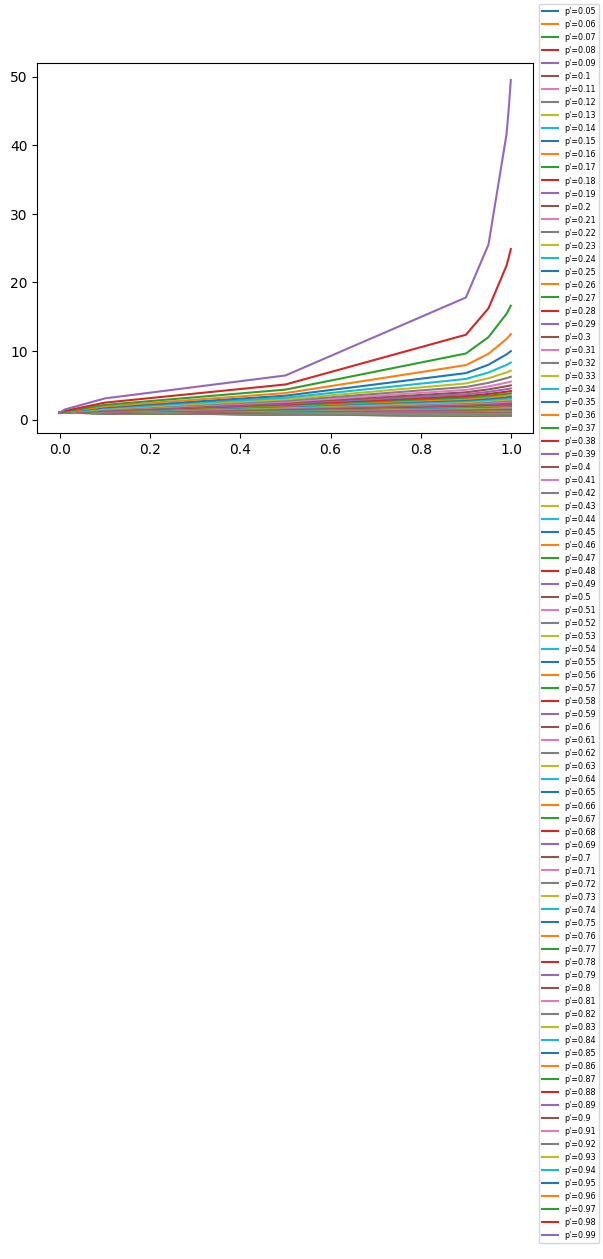

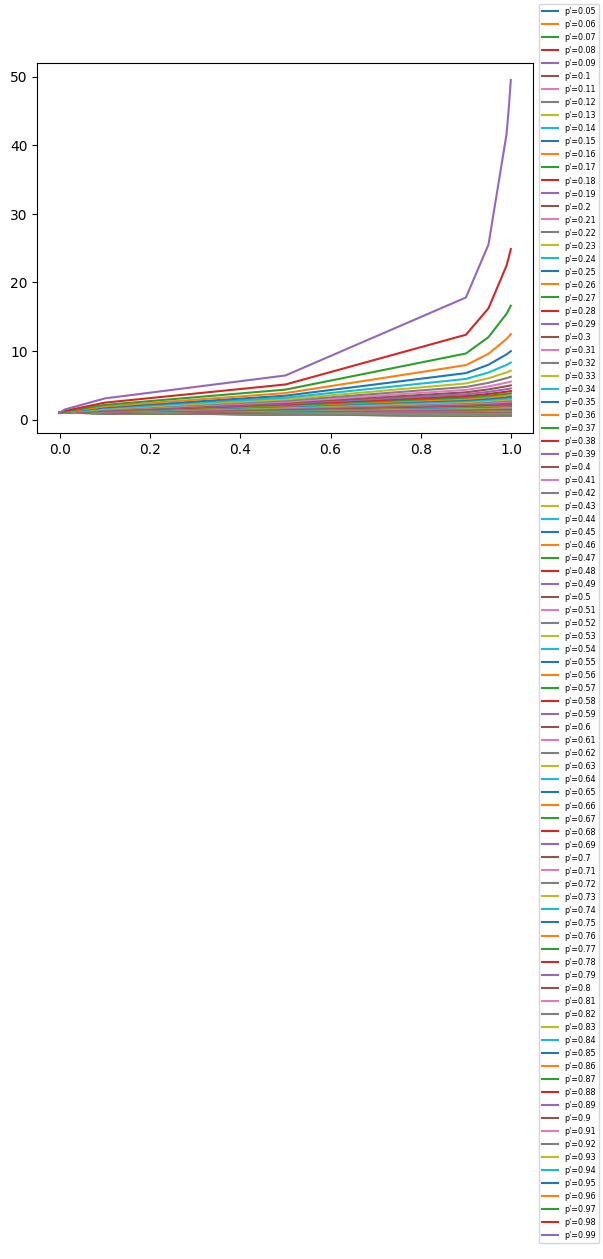

In [25]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_cvar_method,
        _ecc=_ecc[nm_cvar_method],
        list_neg=list_alphas,
        list_pos=list_alphas,
        summation=False,
        continuous=True
    )

_empirical_result['CVAR-min'] = c_min.copy()
_empirical_result['CVAR-max'] = c_max.copy()

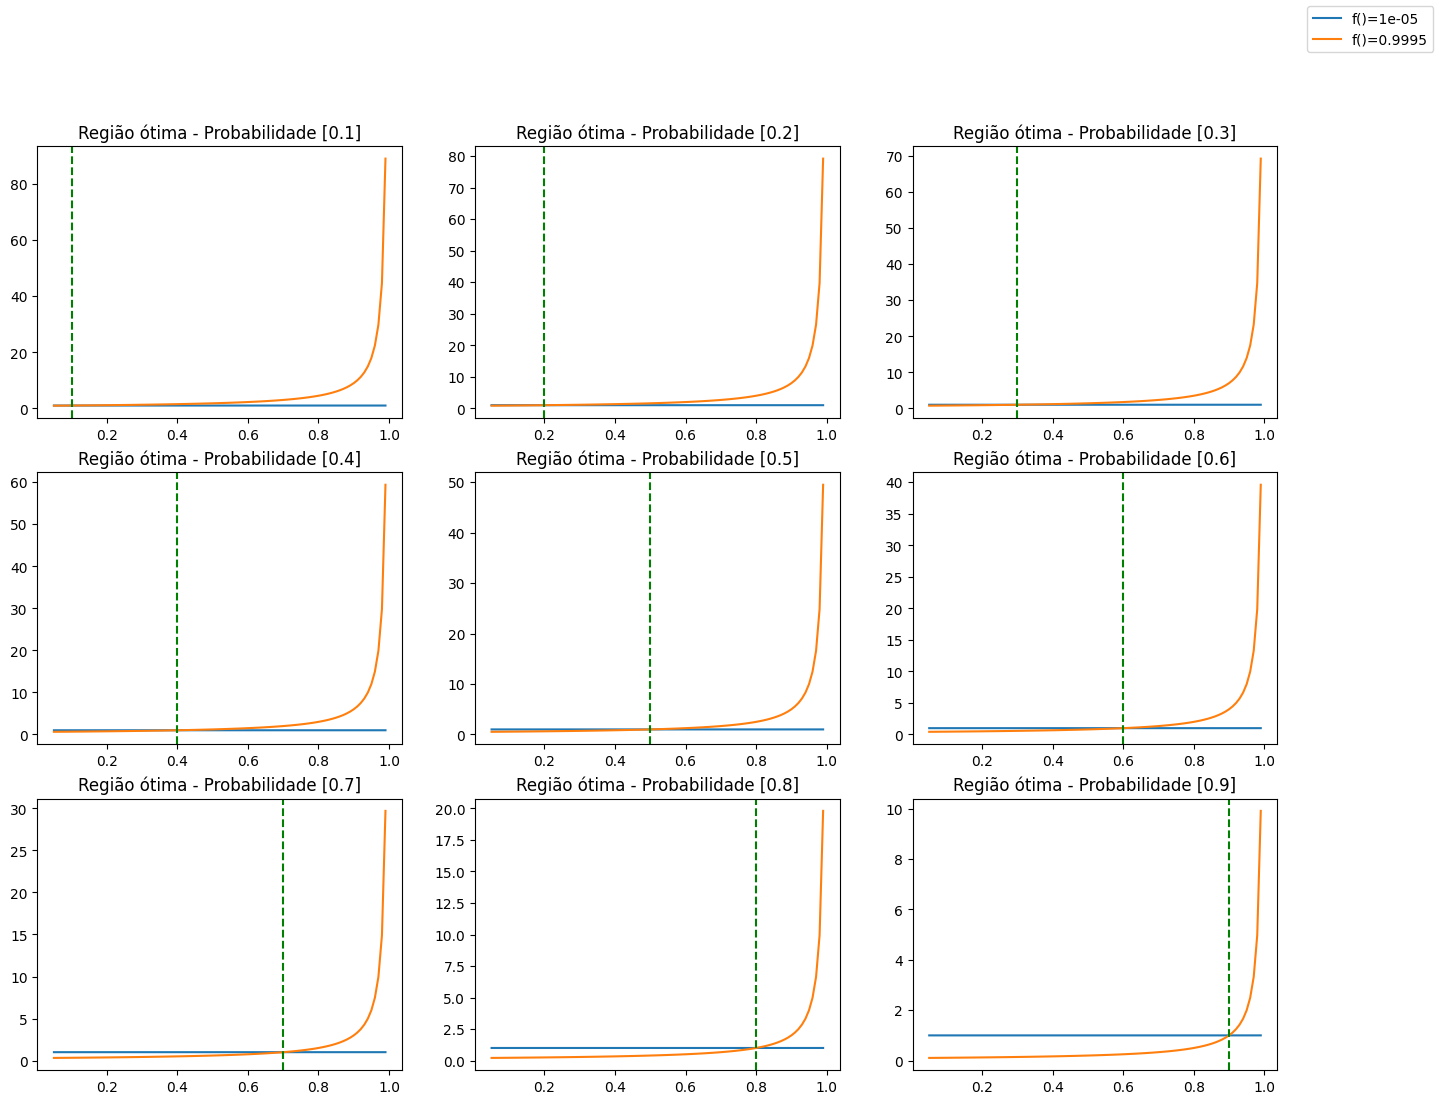

In [26]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_cvar_method,
        _ecc=_ecc[nm_cvar_method],
        list_neg=list_alphas,
        list_pos=list_alphas,
        summation=False,
        continuous=True
    )

_multi_empirical_result['CVAR'] = dict_curves.copy()

### Formalização dos Limites

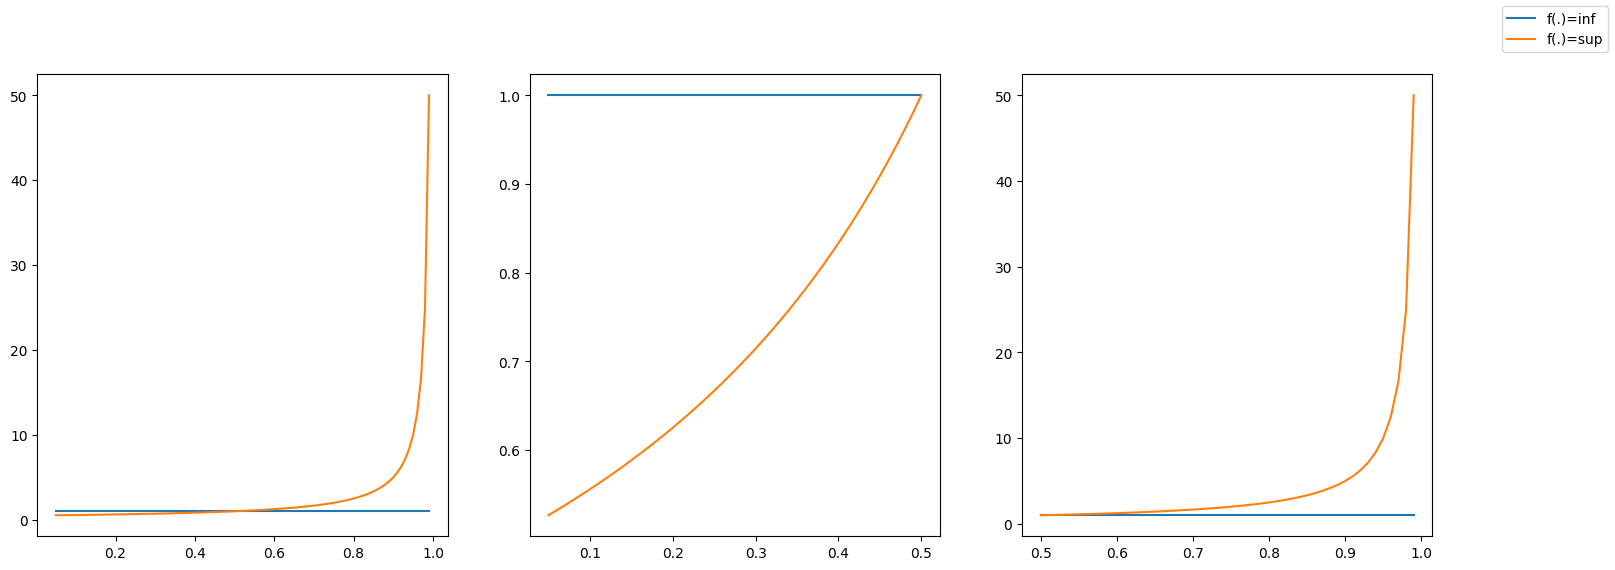

In [27]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits(
    c=c,
    p=p,
    nm_function=nm_cvar_method,
    _ecc=_ecc[nm_cvar_method]
)

_analytical_result['CVAR-min'] = df_curves['inf'].copy()
_analytical_result['CVAR-max'] = df_curves['sup'].copy()

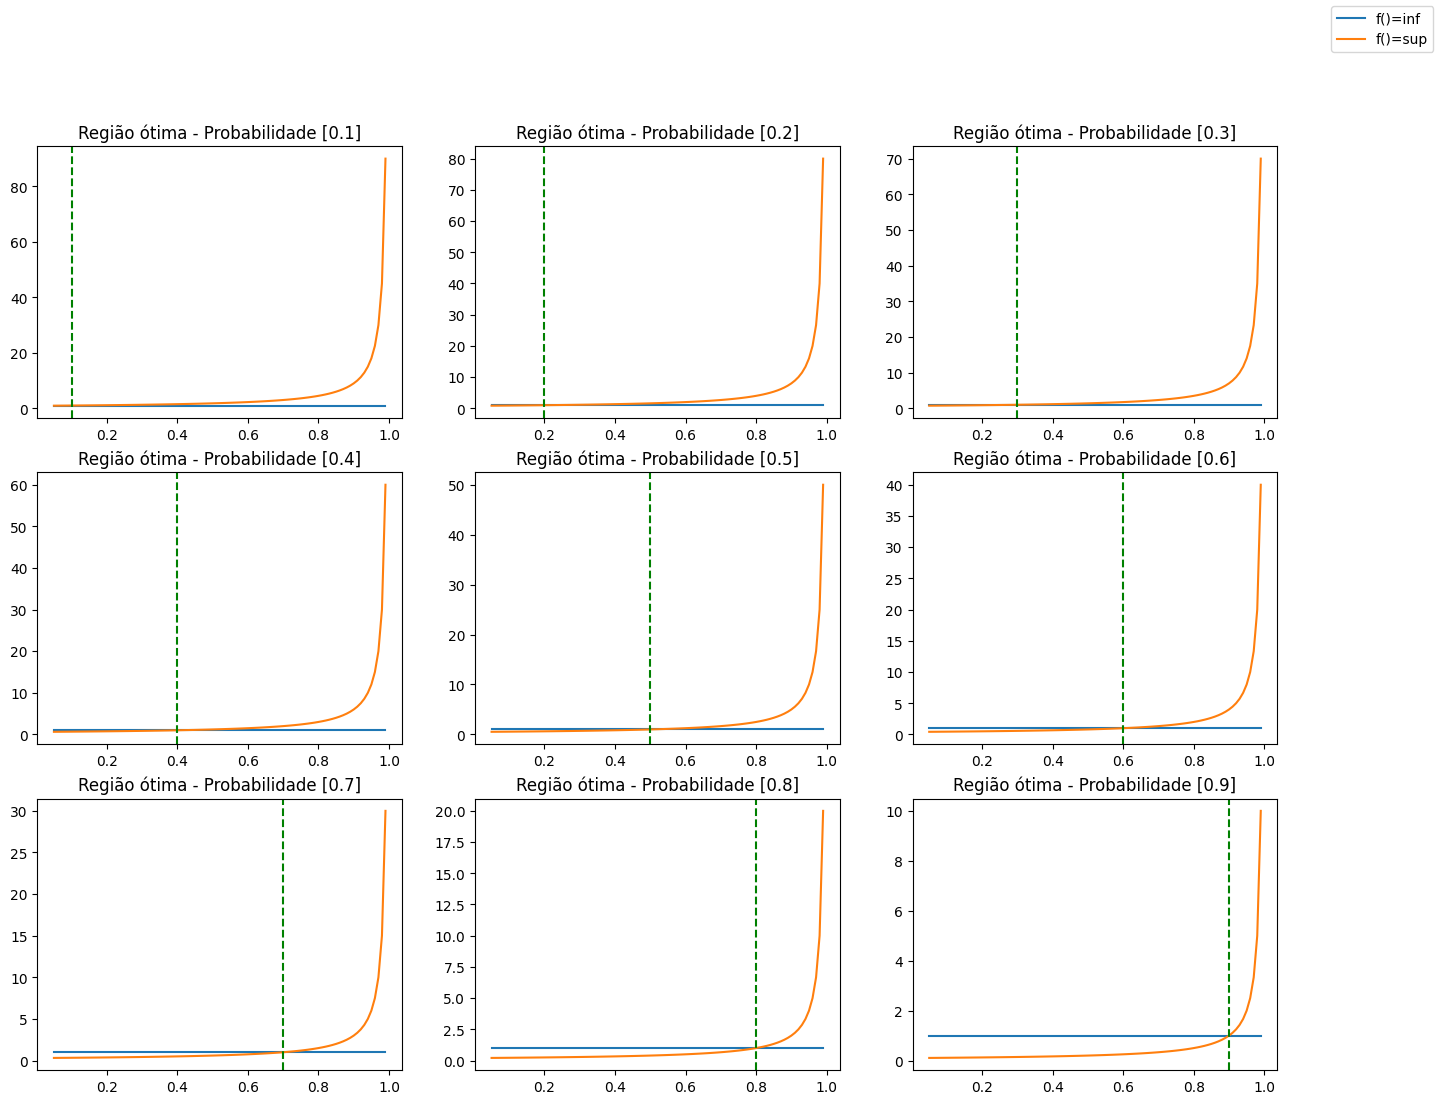

In [28]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits_multiple_prob(
    c=c,
    list_p=list_p,
    nm_function=nm_cvar_method,
    _ecc=_ecc[nm_cvar_method]
)

_multi_analytical_result['CVAR'] = df_curves.copy()

# Comparando Resultados

## Limites Empiricos para Cada Função

In [29]:
def _build_empirical_graph_limits_each_function_plotly(_empirical_result):
    fig_min = go.Figure()
    fig_max = go.Figure()
    
    for _func in _empirical_result:
        curve = _empirical_result[_func]
        params = {
            'x':curve.keys(), 
            'y':curve.values,
            'mode':'lines',
            'name':_func
        }
        
        if 'max' in _func:
            fig_max.add_trace(
                go.Scatter(
                    **params
                )
            )
        elif 'min' in _func:
            fig_min.add_trace(
                go.Scatter(
                    **params
                )
            )
    
    fig_min.show()
    fig_max.show()

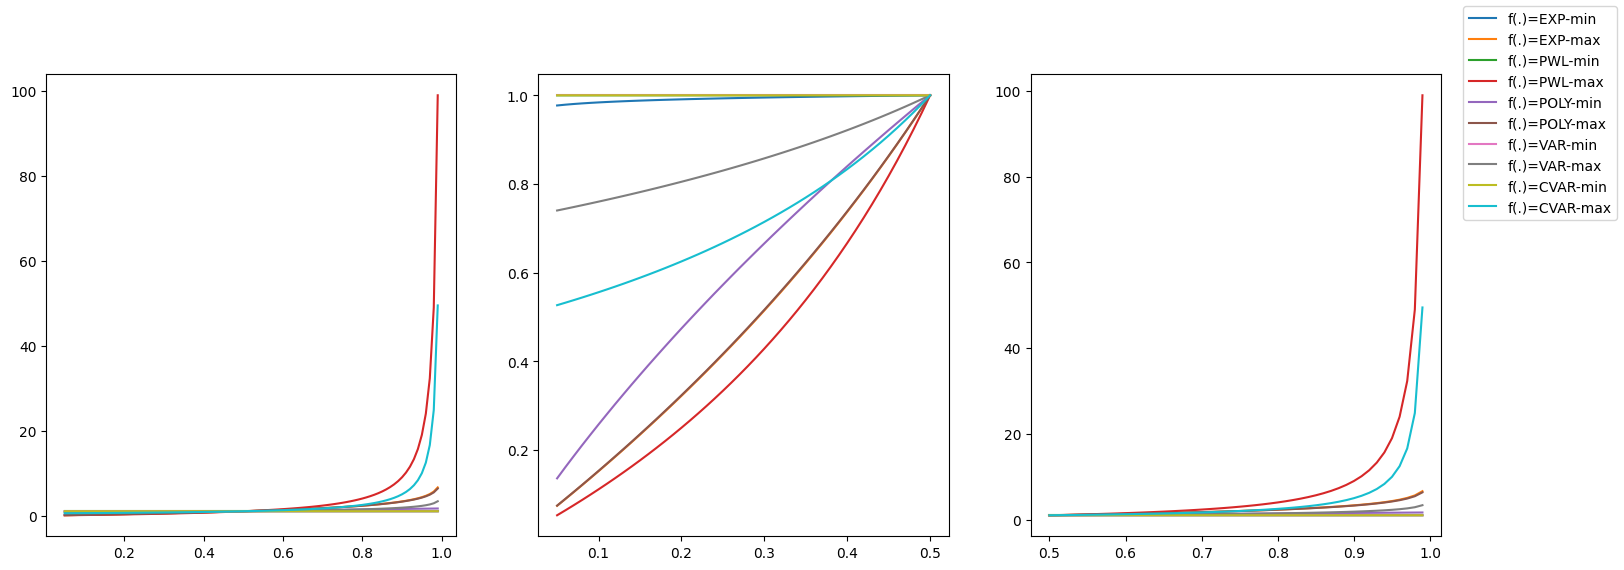

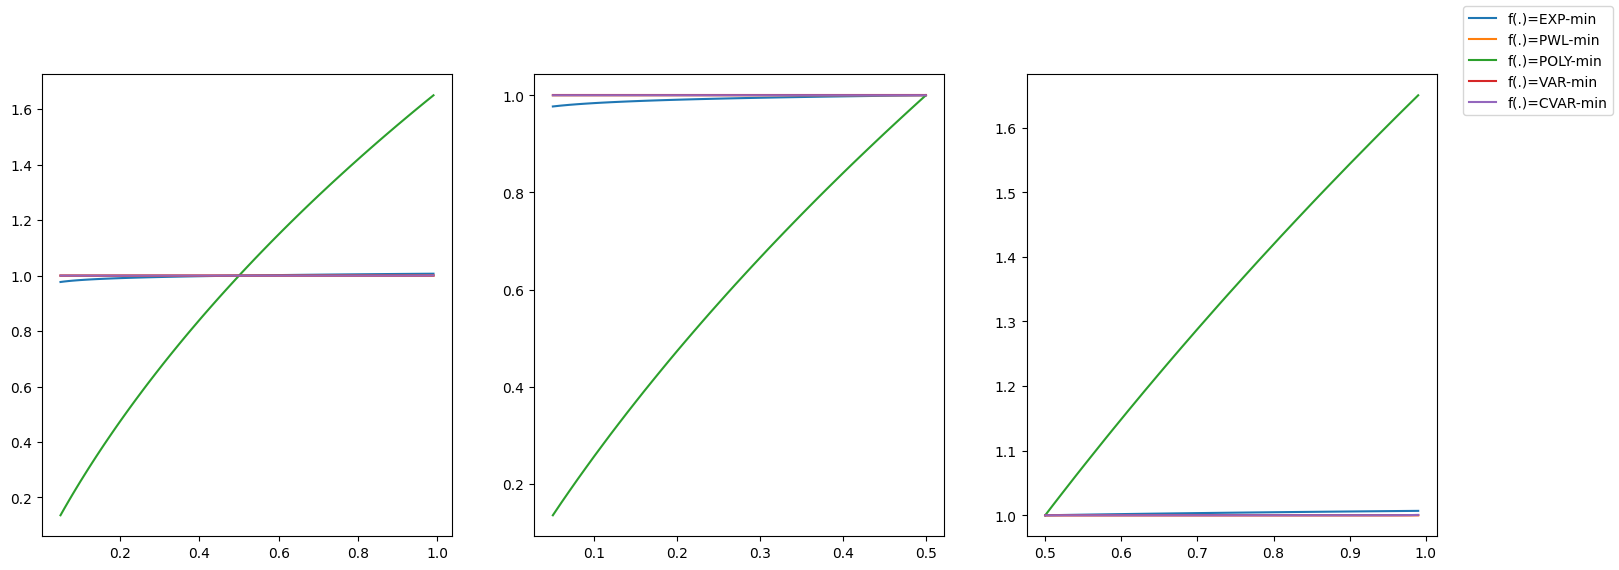

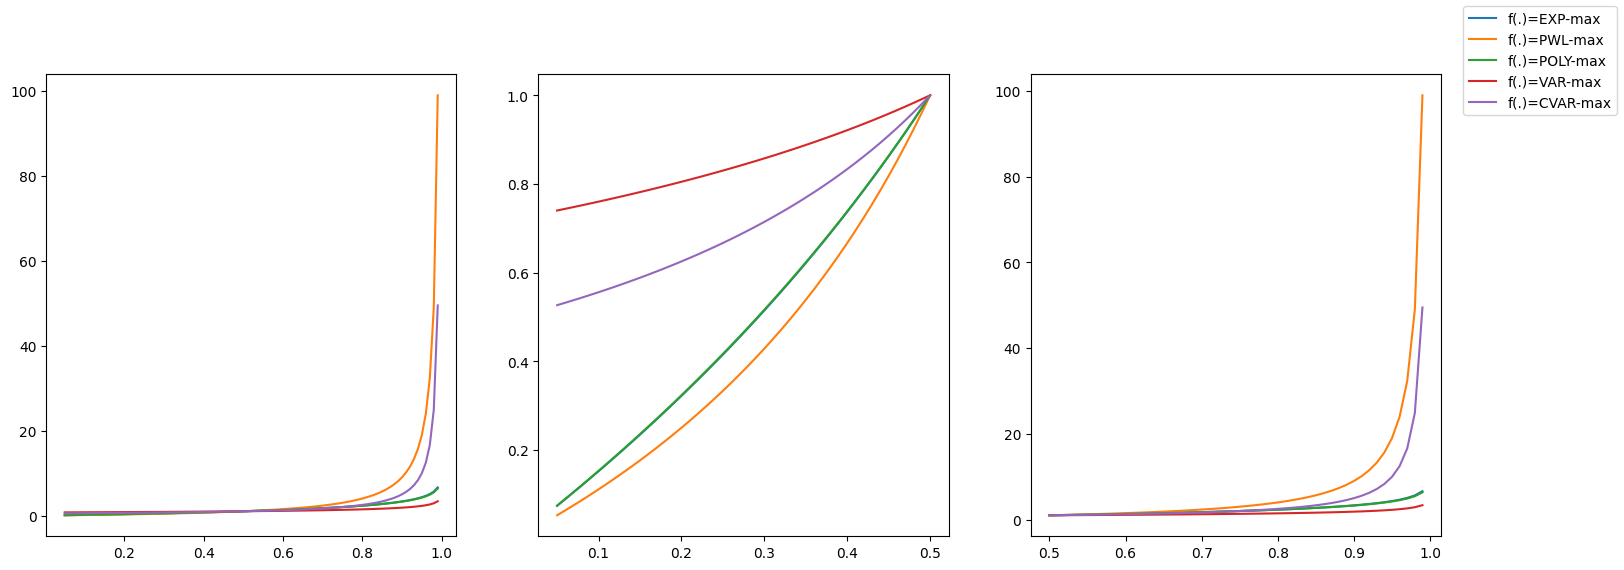

In [30]:
_bc.build_empirical_graph_limits_each_function(_empirical_result)

## Limites Empiricos para Multiplos p'

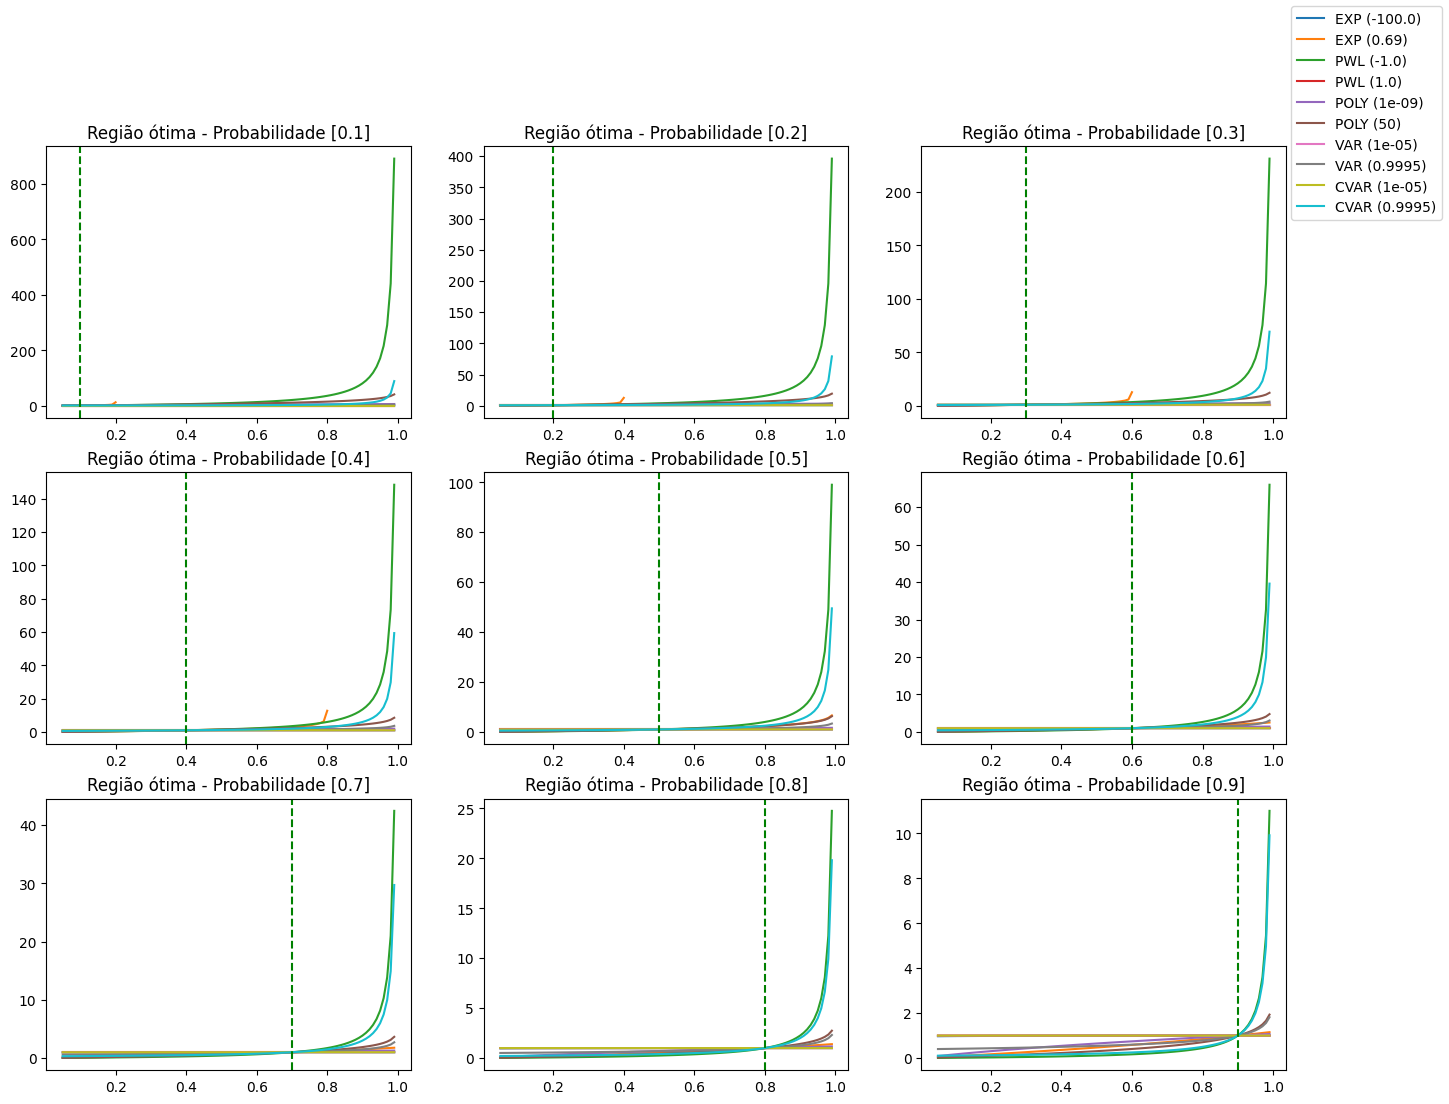

In [31]:
_cp.plot_all_curves_subplots_multiple_probabilities(_multi_empirical_result, list_p)

## Limites Analíticos

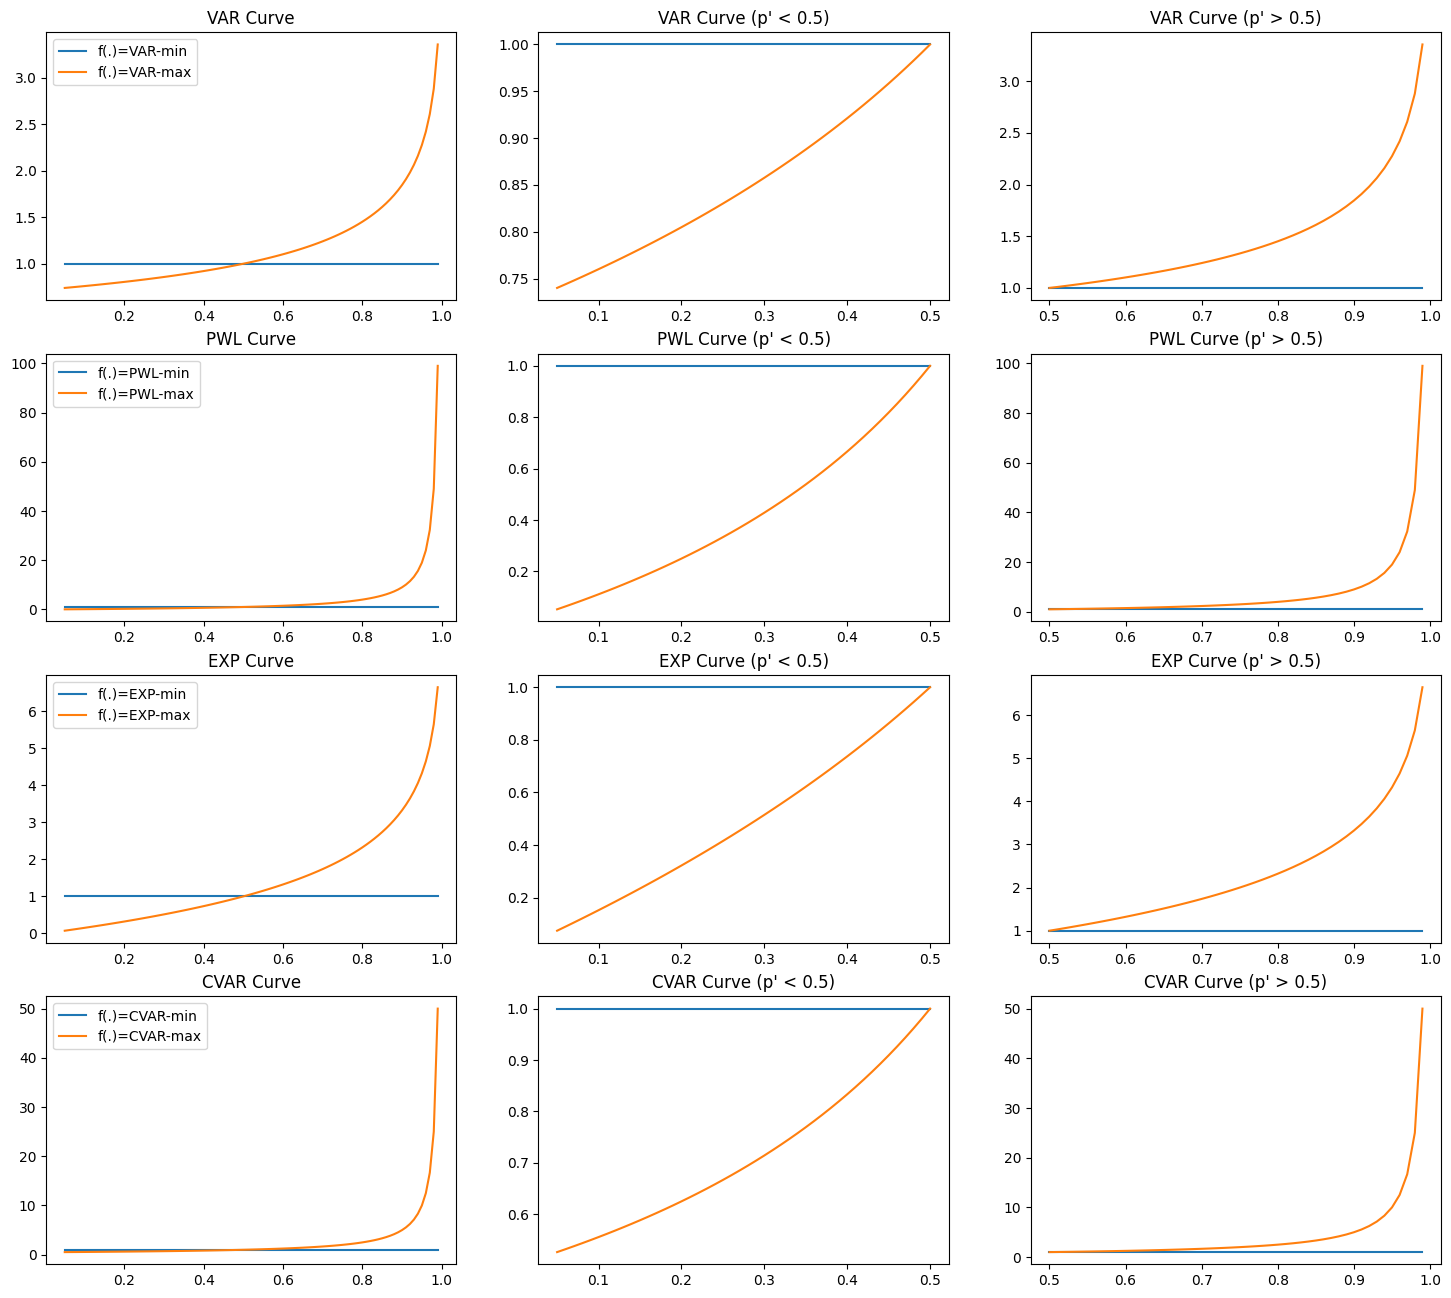

In [60]:
_cp.plot_curve_subplots_all_methods(_analytical_result, filter_prob=0.5)

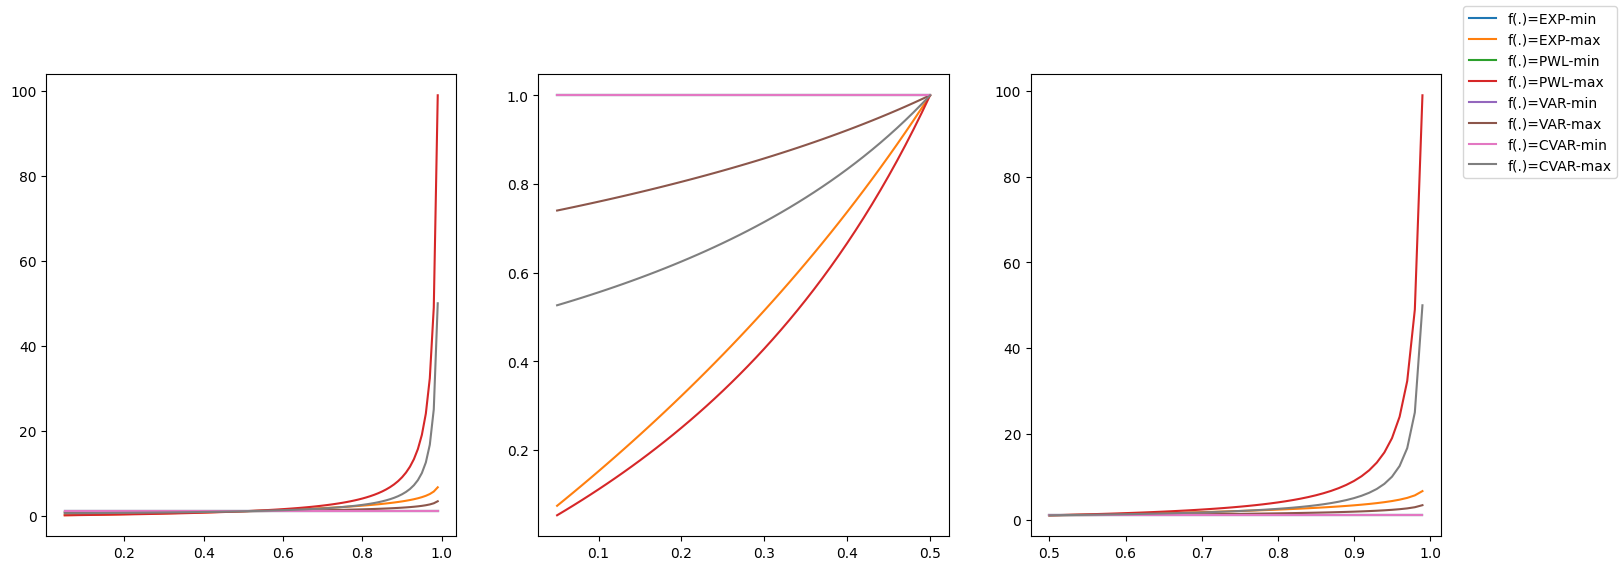

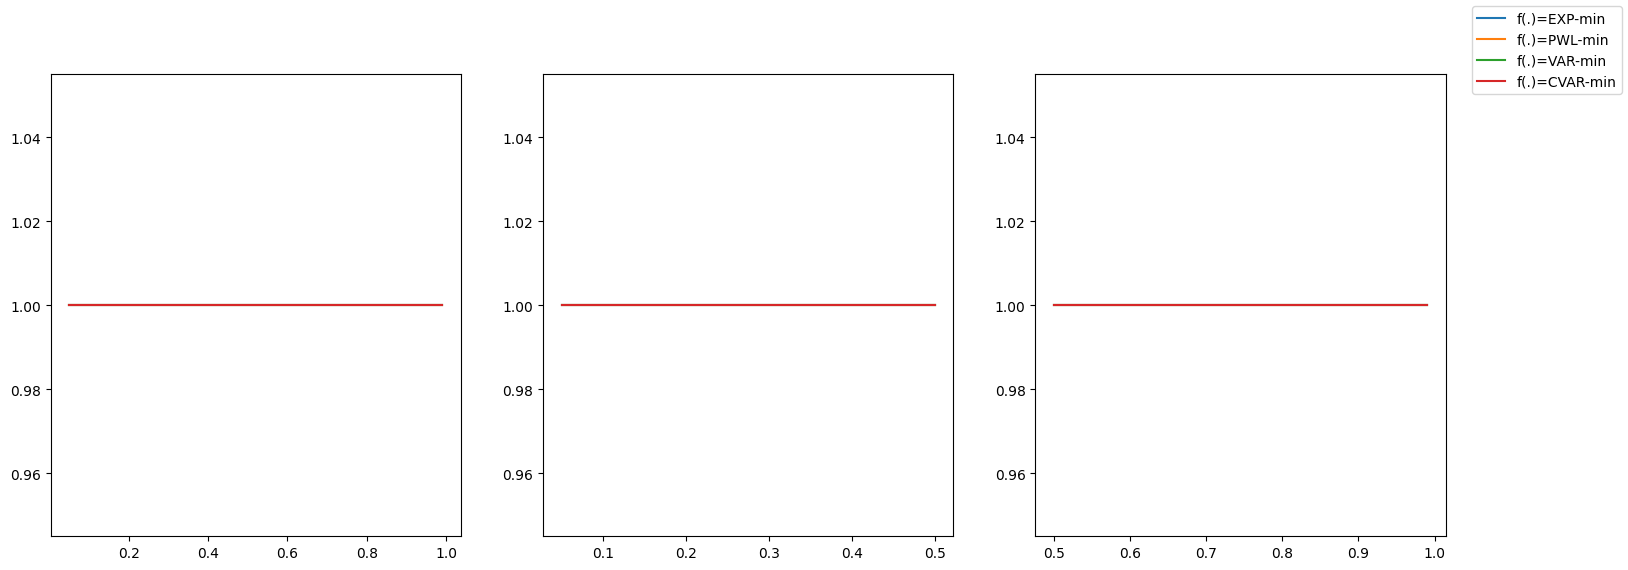

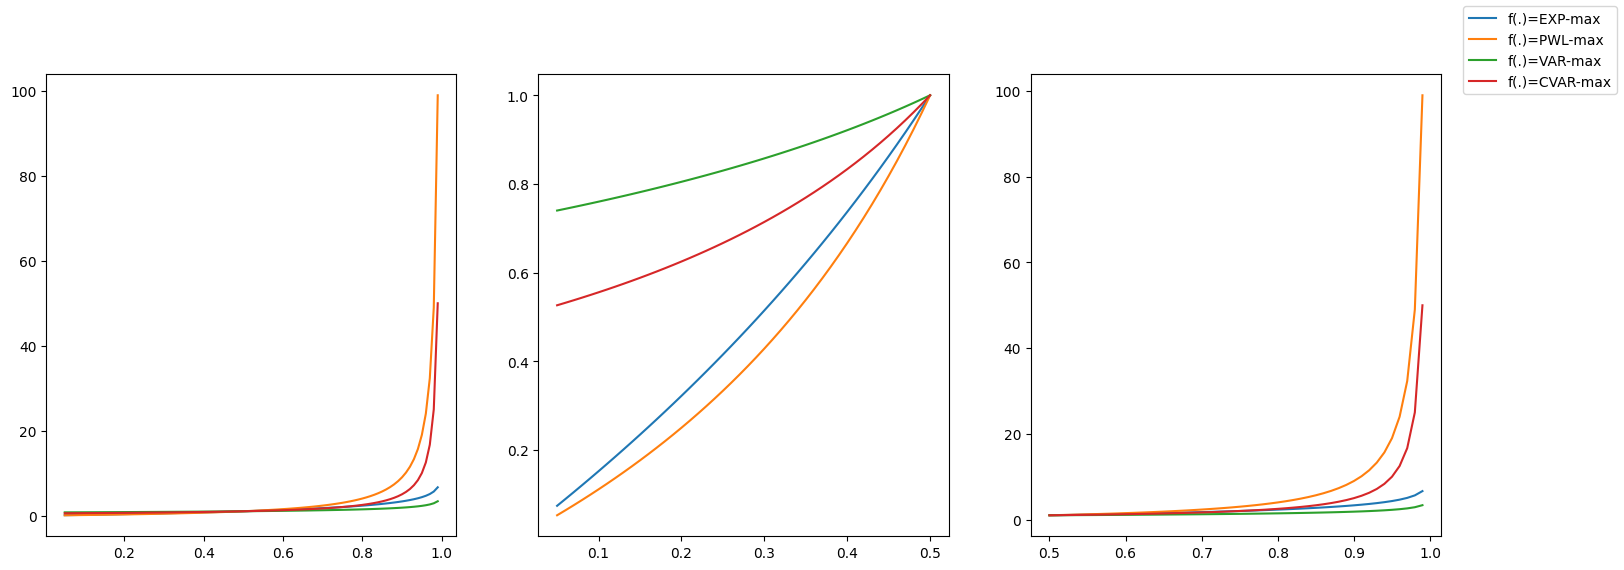

In [32]:
_bc.build_empirical_graph_limits_each_function(_analytical_result)

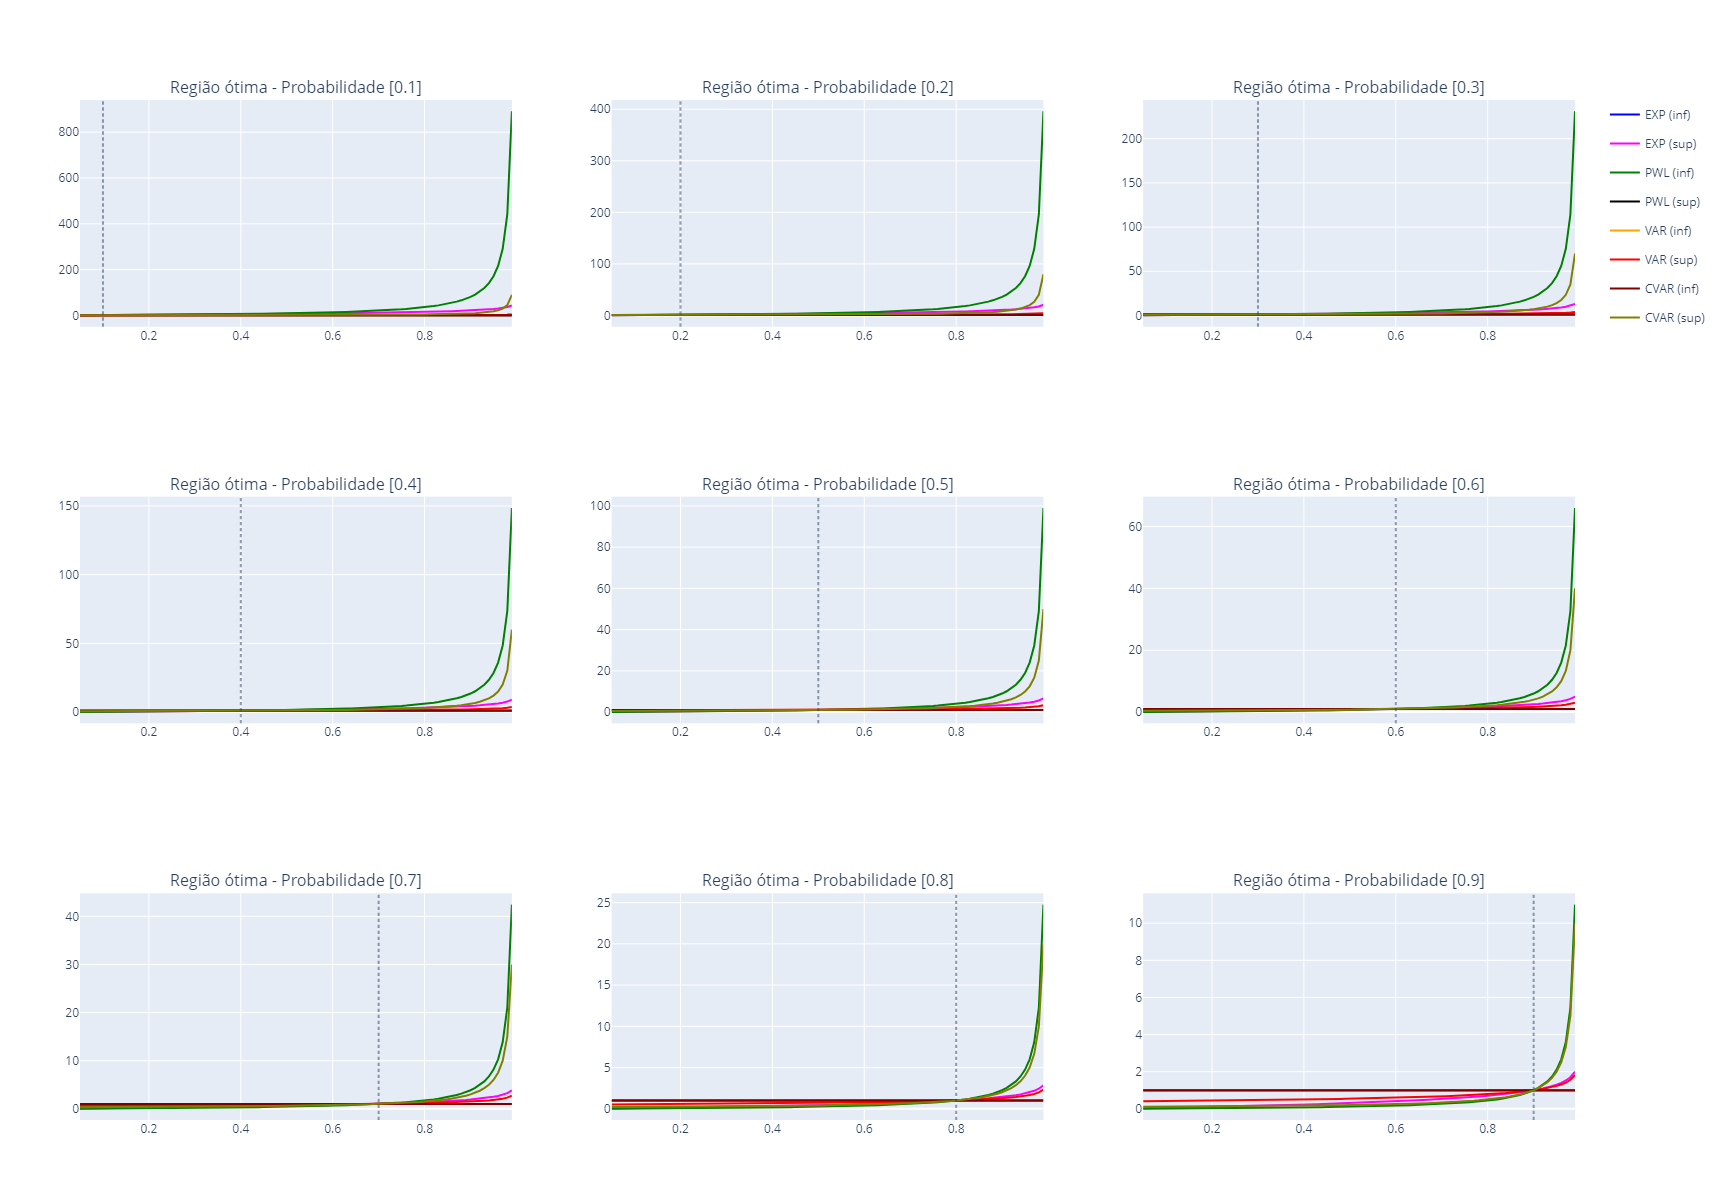

In [33]:
_bc_plotly.build_all_graph_limits_multi_prob(_multi_analytical_result, list_p)